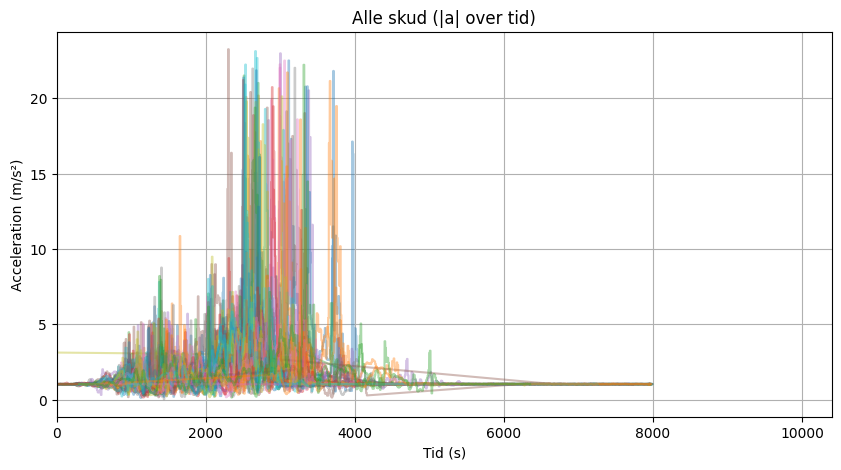

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob, os

path = "../skud"
files = sorted(glob.glob(os.path.join(path, "skud*.csv")))

plt.figure(figsize=(10,5))

for f in files:
    data = pd.read_csv(f, decimal=",")
    data.columns = [c.strip().lower() for c in data.columns]

    for col in ['accx', 'accy', 'accz', 'timestamp']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data['a_mag'] = np.sqrt(data['accx']**2 + data['accy']**2 + data['accz']**2)
    t = (data['timestamp'] - data['timestamp'].iloc[0]) / 1000.0  # sekunder

    plt.plot(t, data['a_mag'], alpha=0.4)

plt.title("Alle skud (|a| over tid)")
plt.xlabel("Tid (s)")
plt.ylabel("Acceleration (m/s²)")
plt.xlim(left=0)
plt.grid(True)
plt.show()


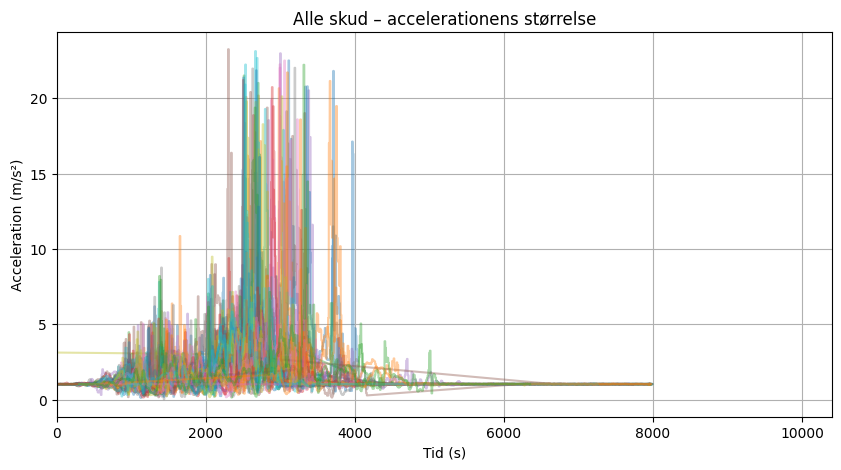

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob, os

path = "../skud"
files = sorted(glob.glob(os.path.join(path, "skud*.csv")))

plt.figure(figsize=(10,5))

for f in files:
    data = pd.read_csv(f, decimal=",")
    data.columns = [c.strip().lower() for c in data.columns]

    for col in ['accx','accy','accz','timestamp']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data['a_mag'] = np.sqrt(data['accx']**2 + data['accy']**2 + data['accz']**2)
    t = (data['timestamp'] - data['timestamp'].iloc[0]) / 1000.0
    plt.plot(t, data['a_mag'], alpha=0.4)

plt.title("Alle skud – accelerationens størrelse")
plt.xlabel("Tid (s)")
plt.xlim(left=0)
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.show()


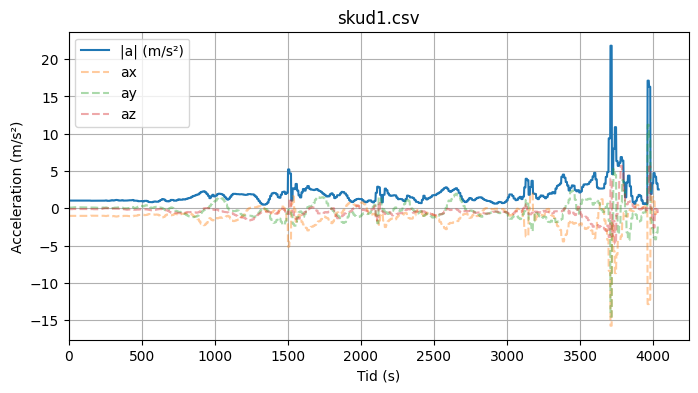

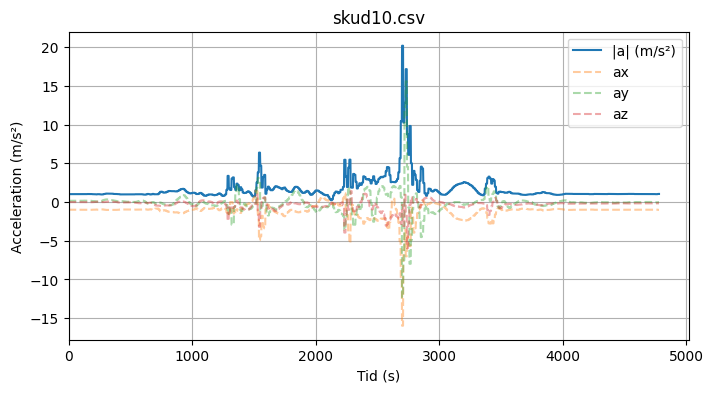

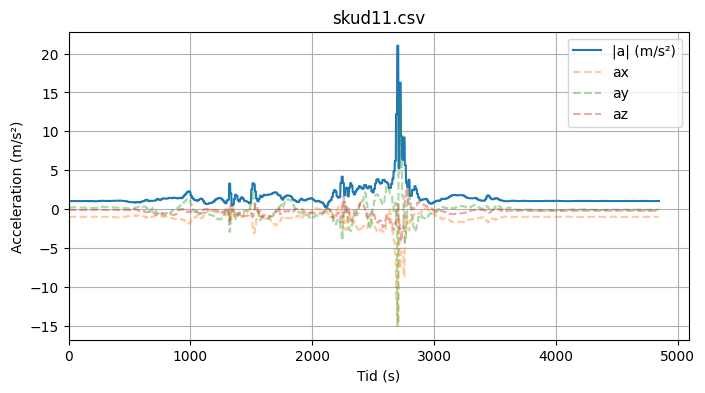

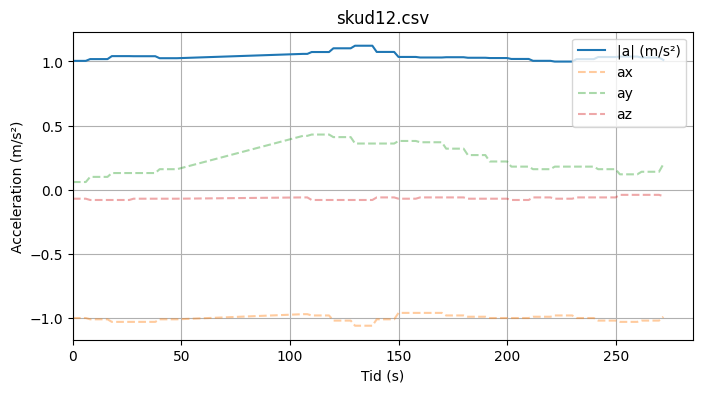

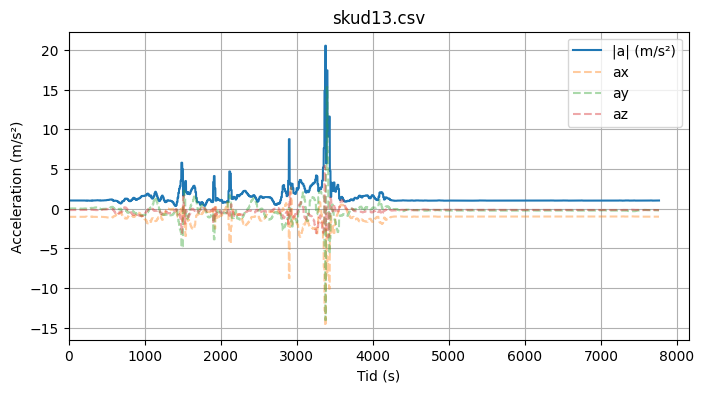

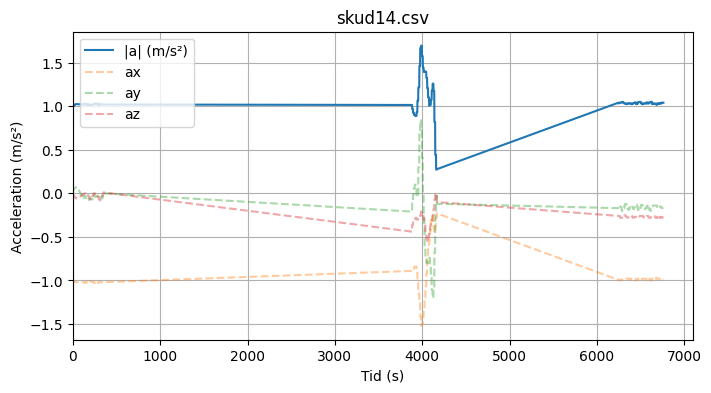

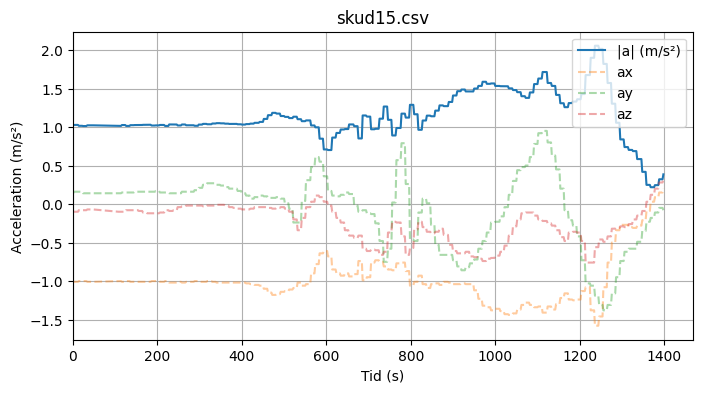

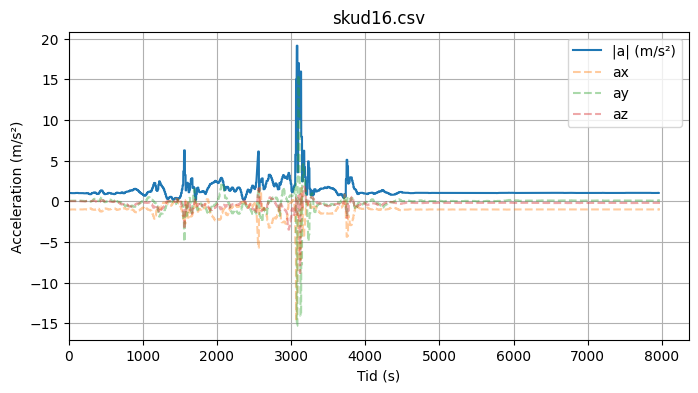

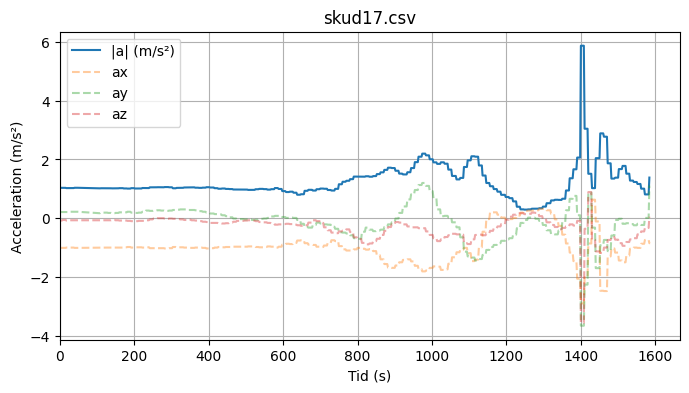

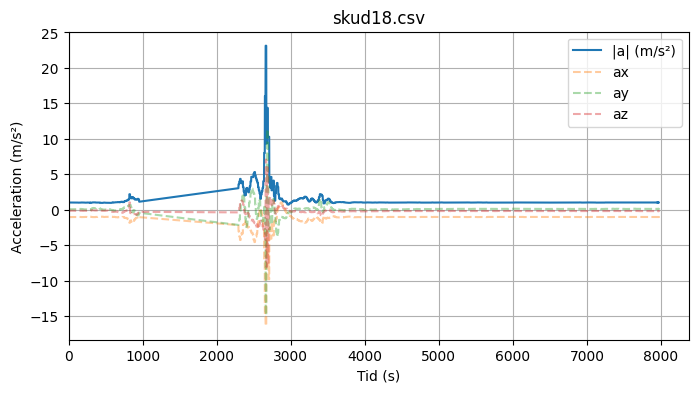

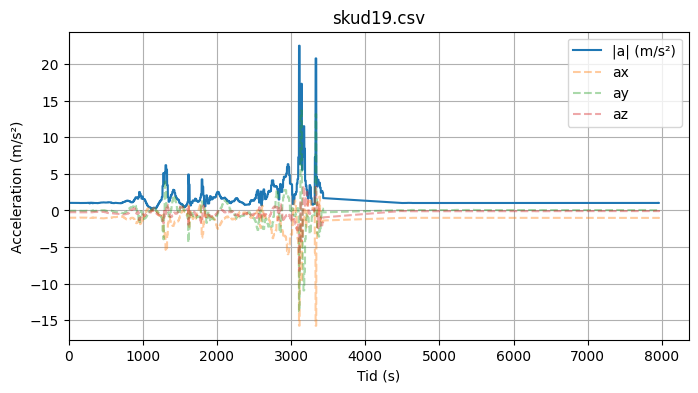

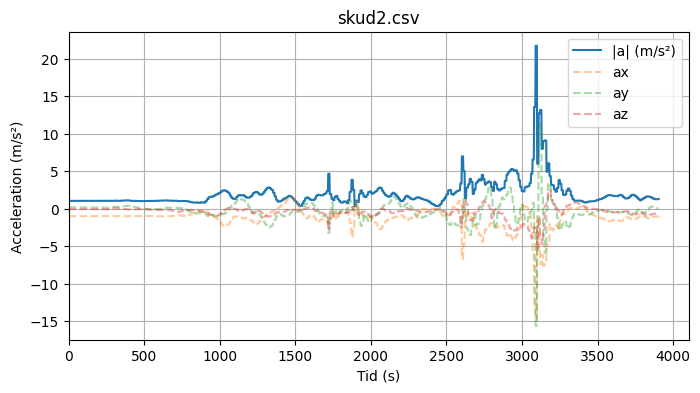

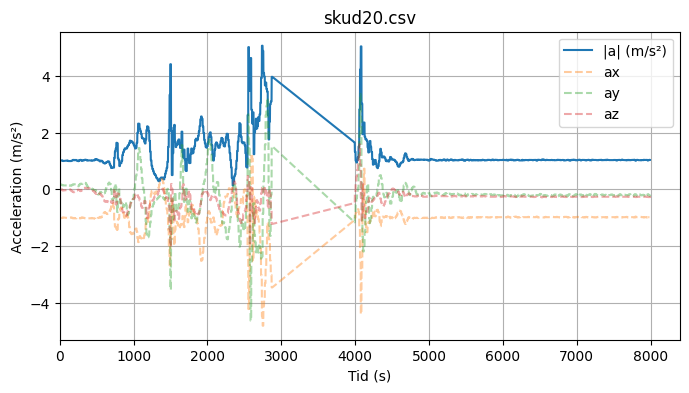

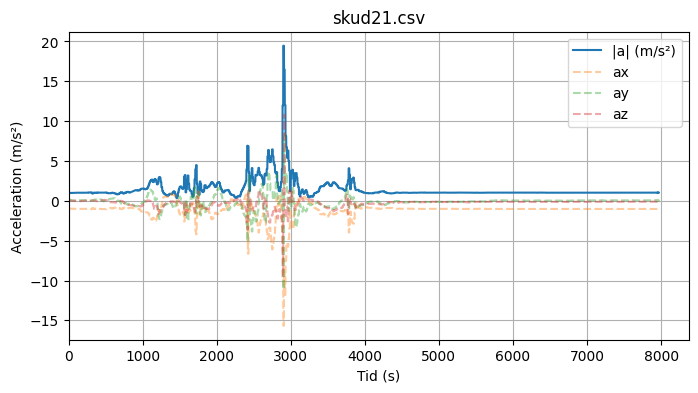

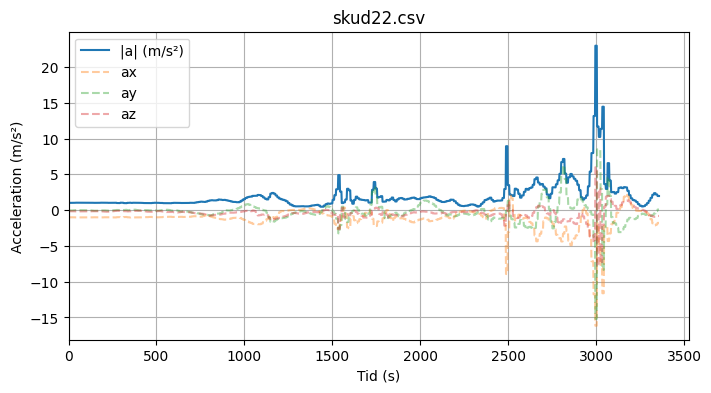

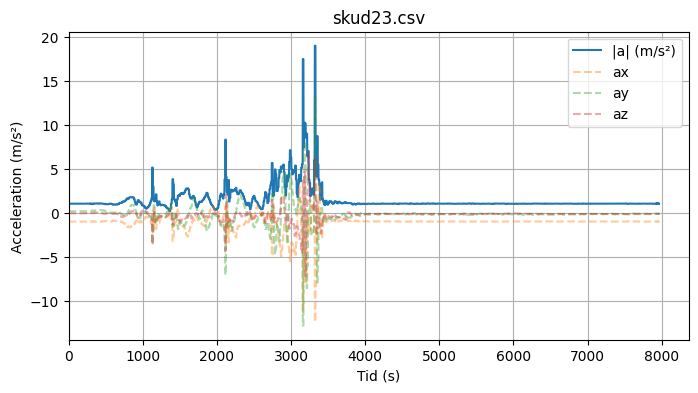

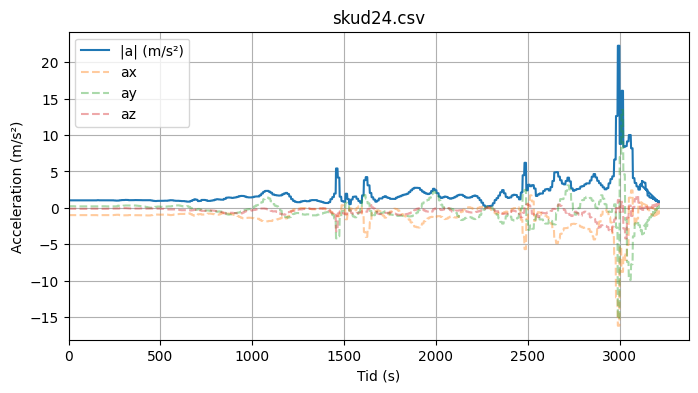

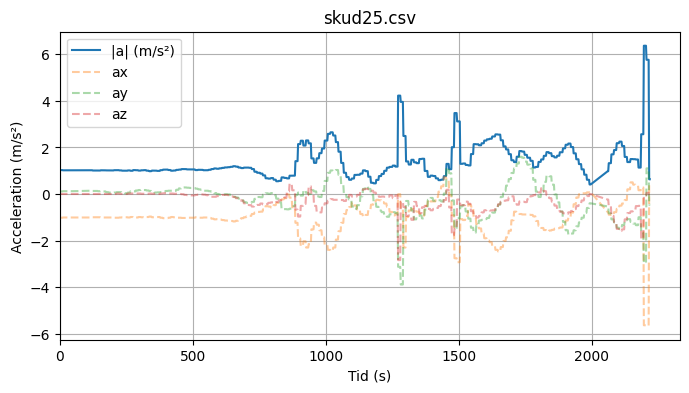

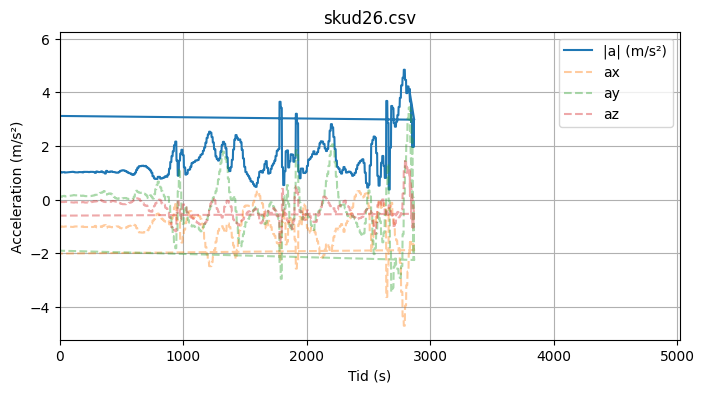

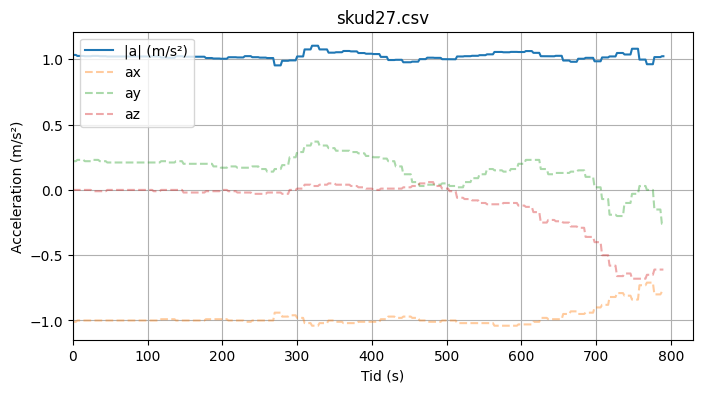

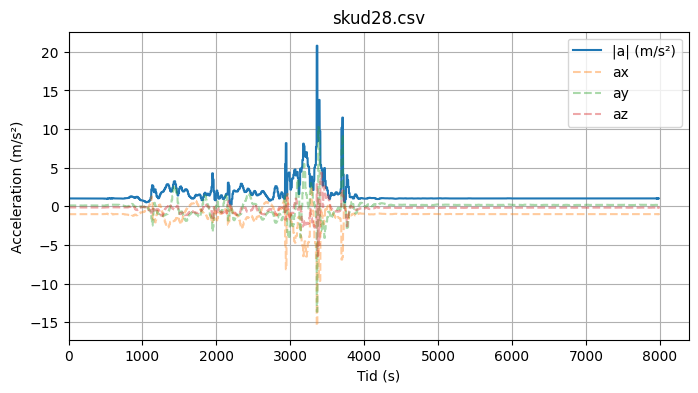

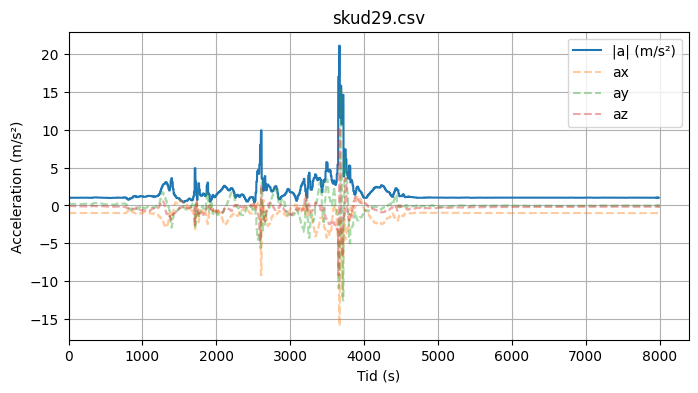

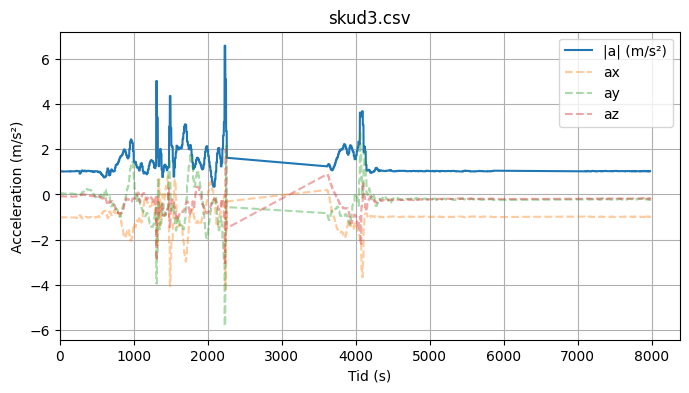

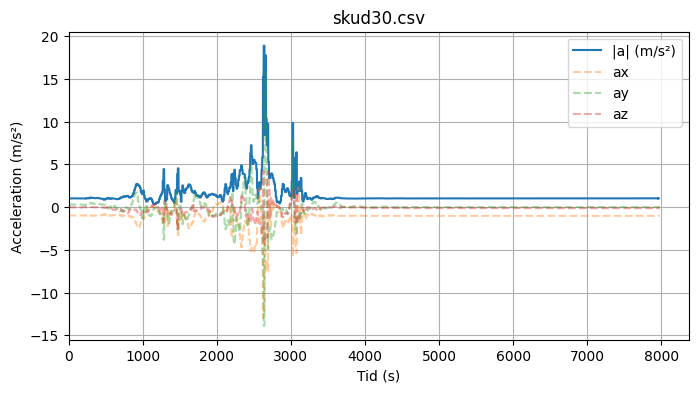

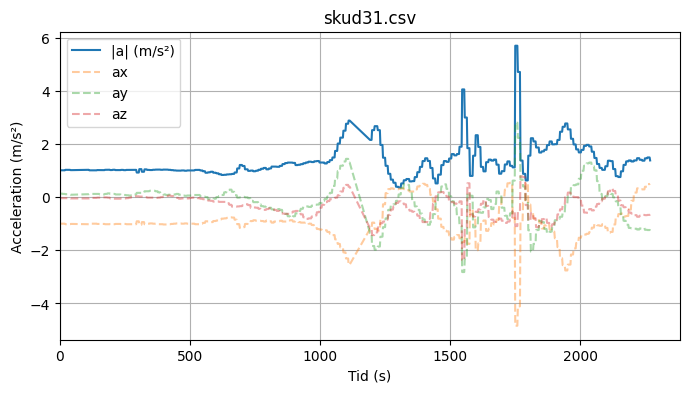

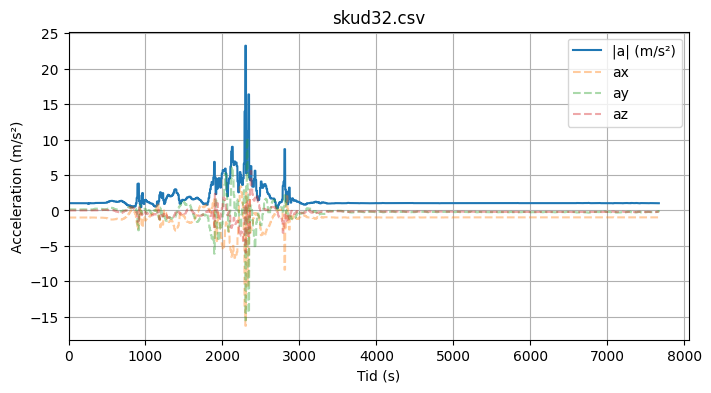

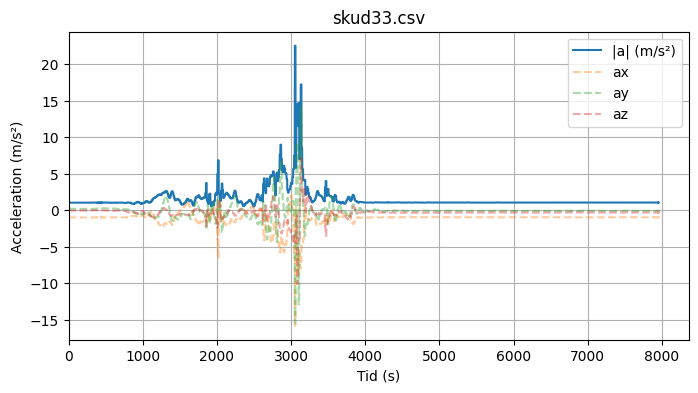

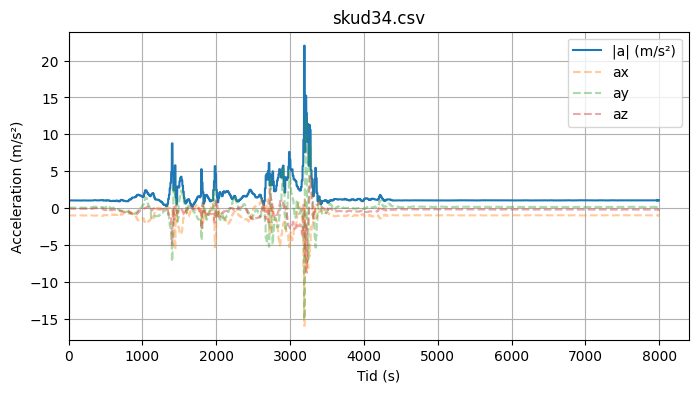

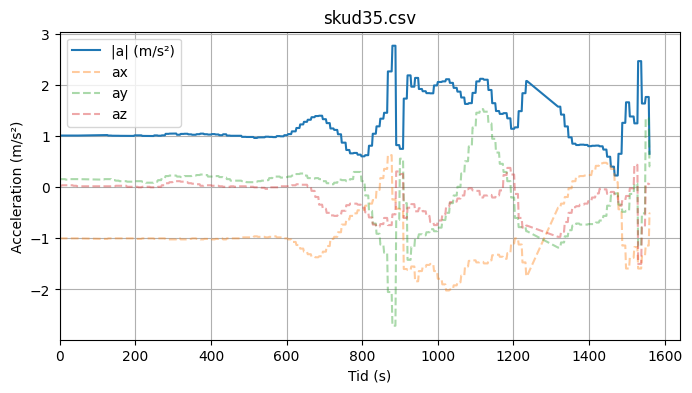

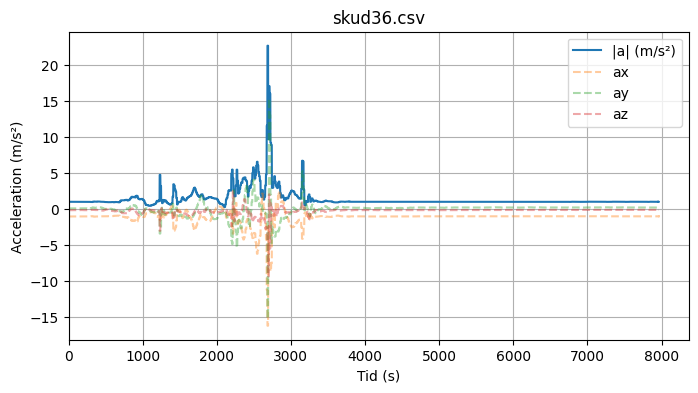

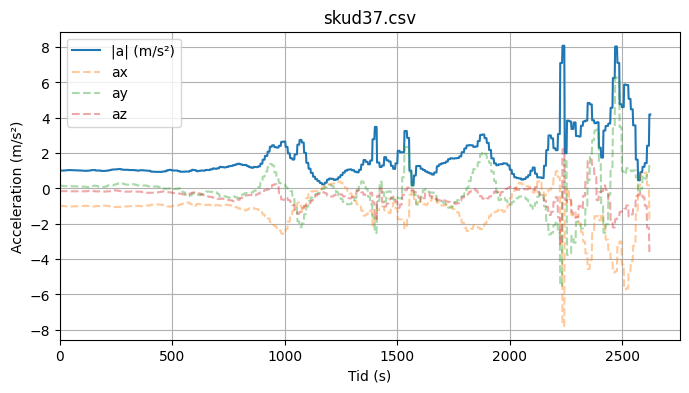

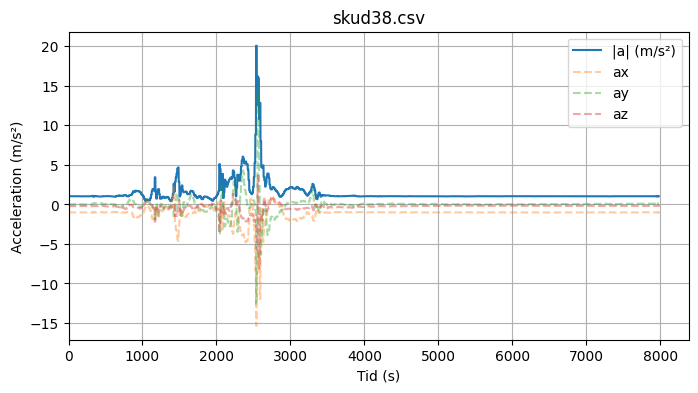

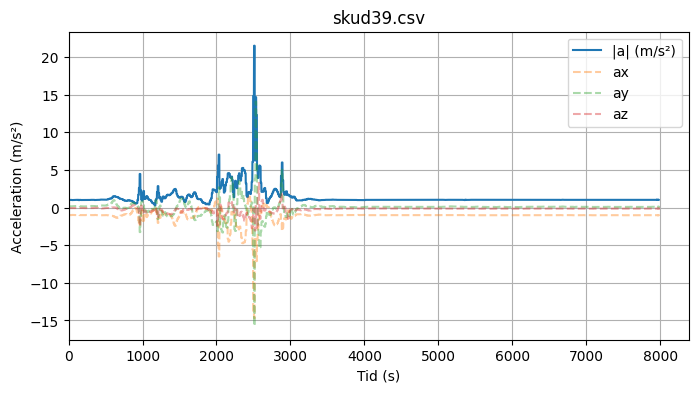

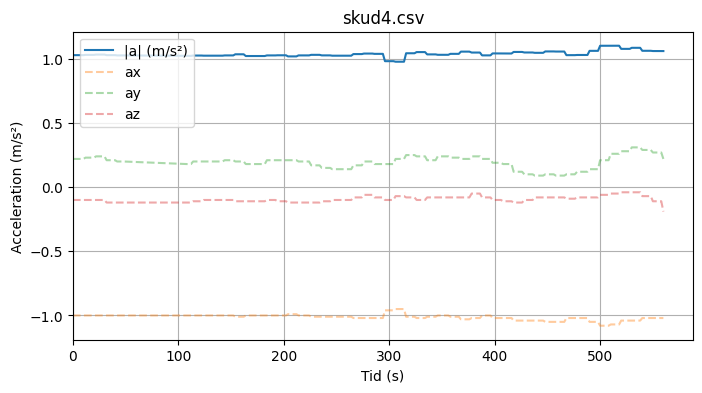

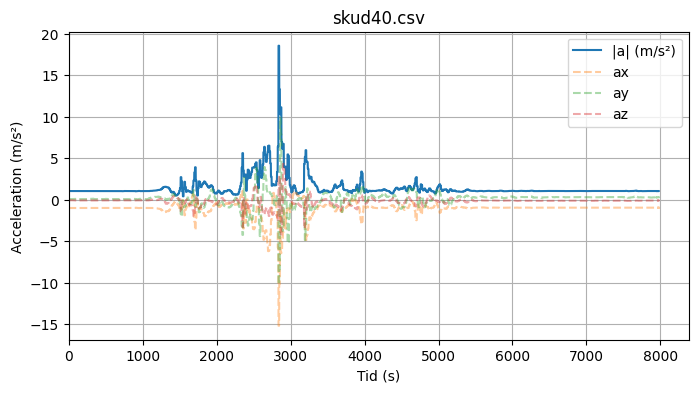

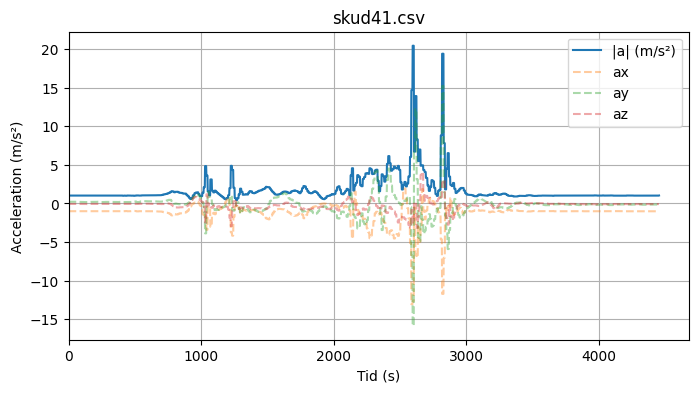

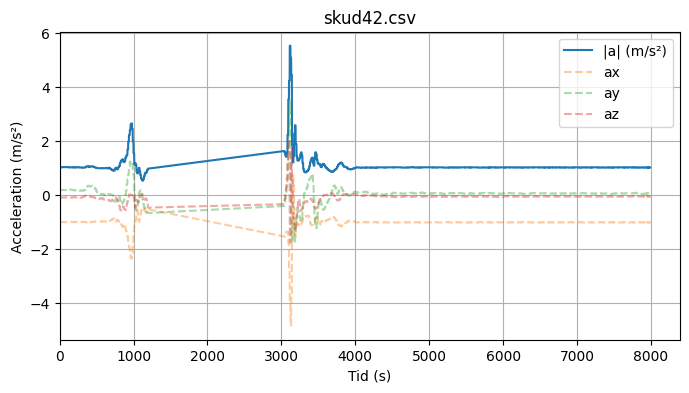

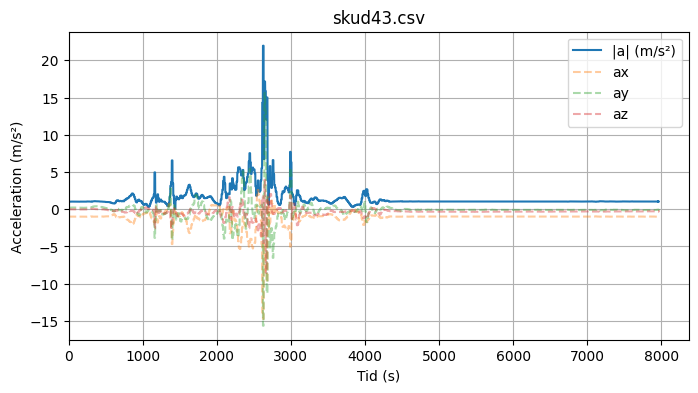

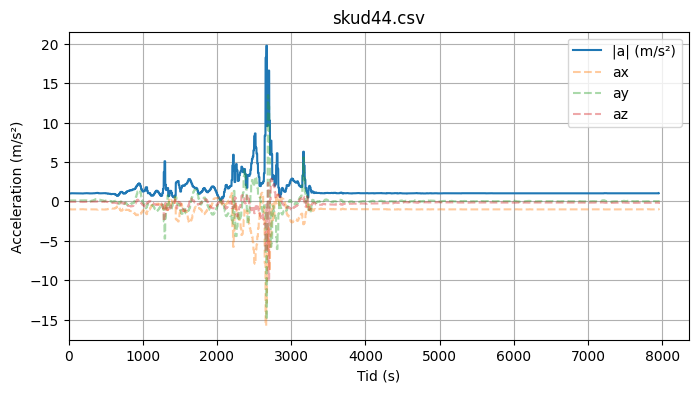

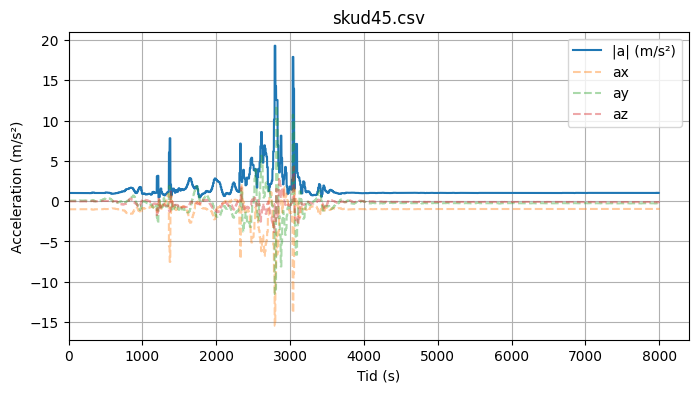

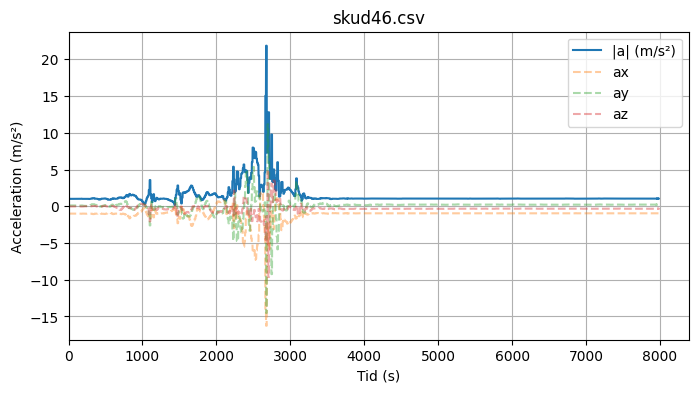

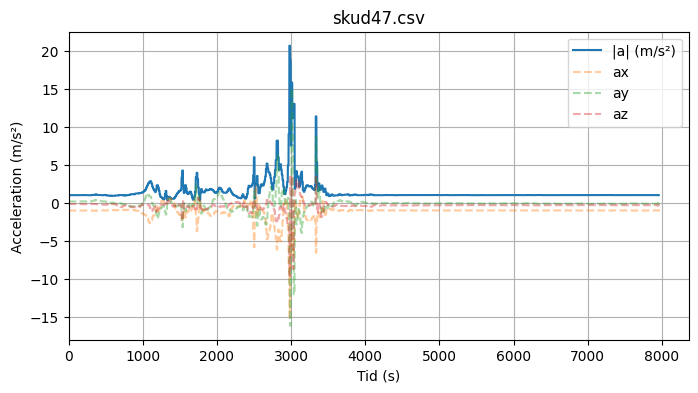

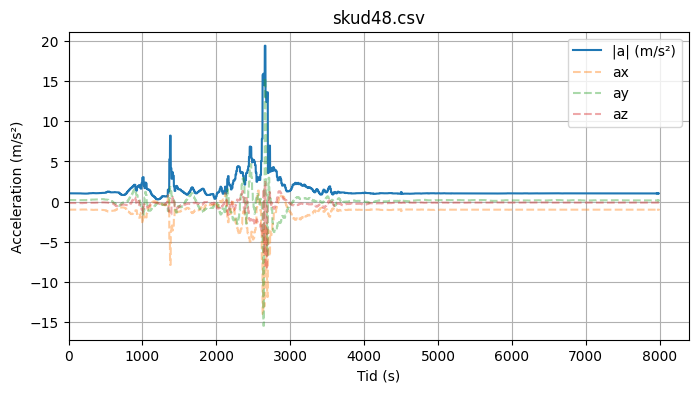

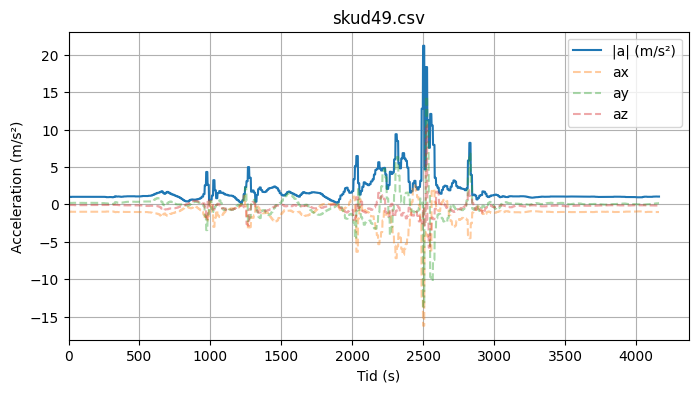

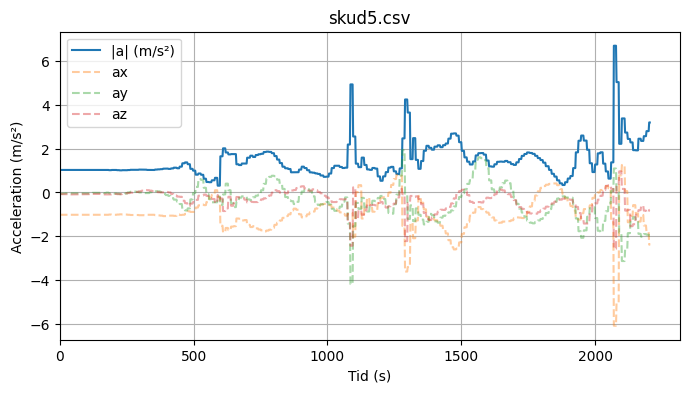

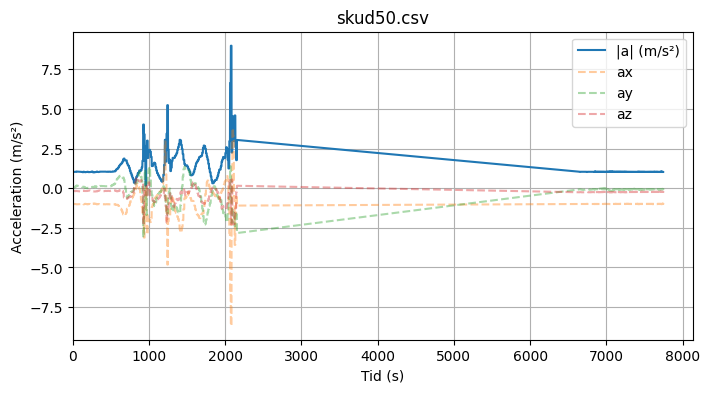

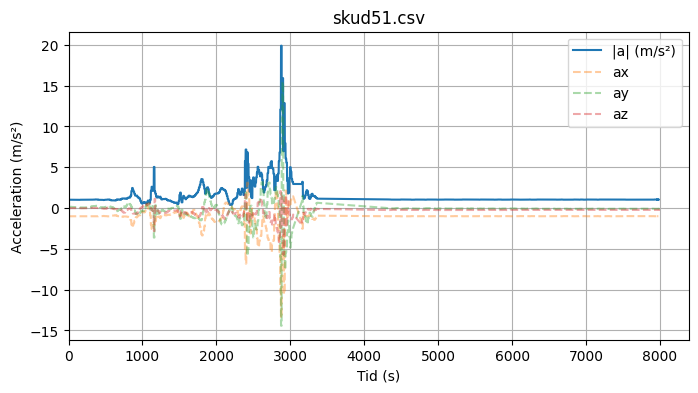

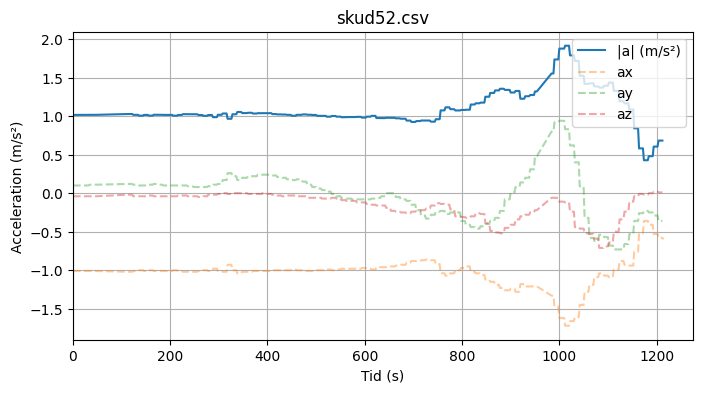

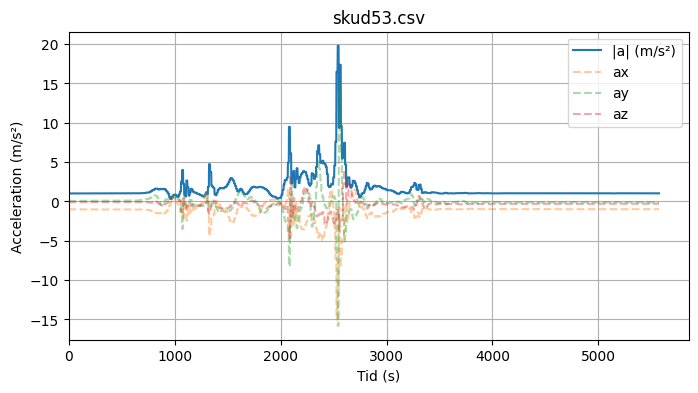

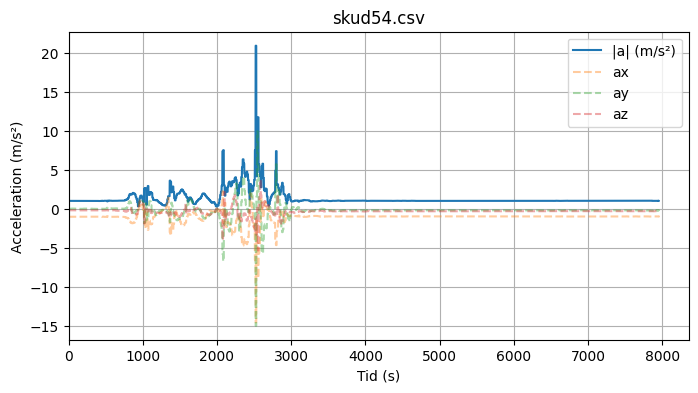

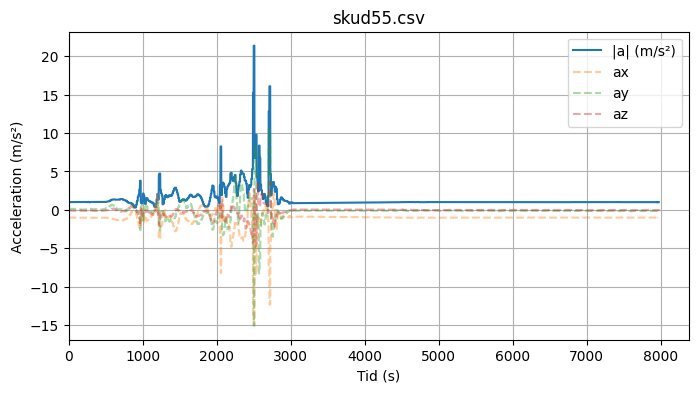

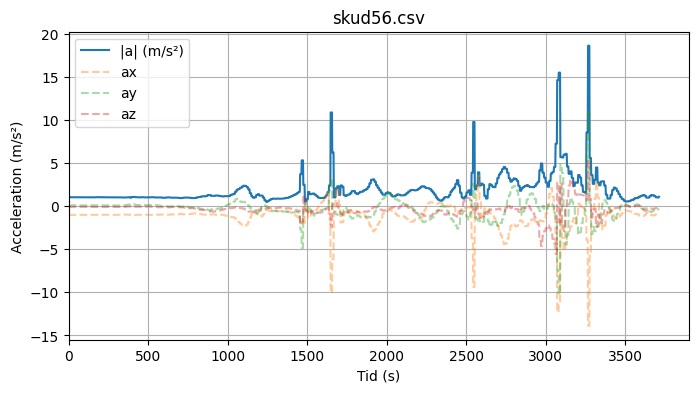

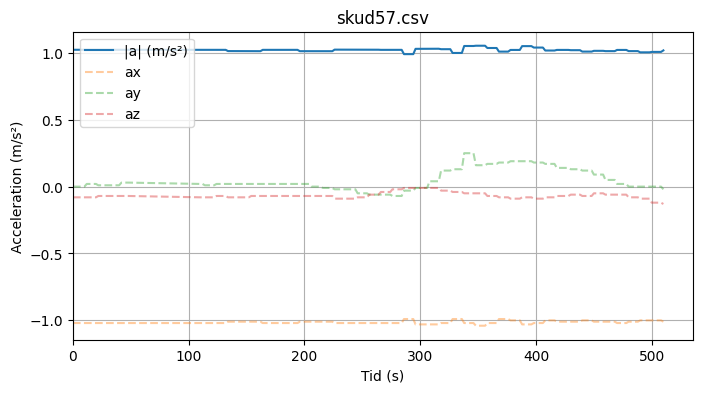

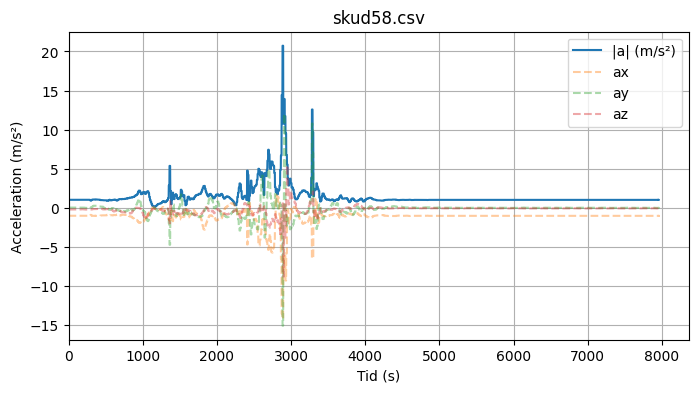

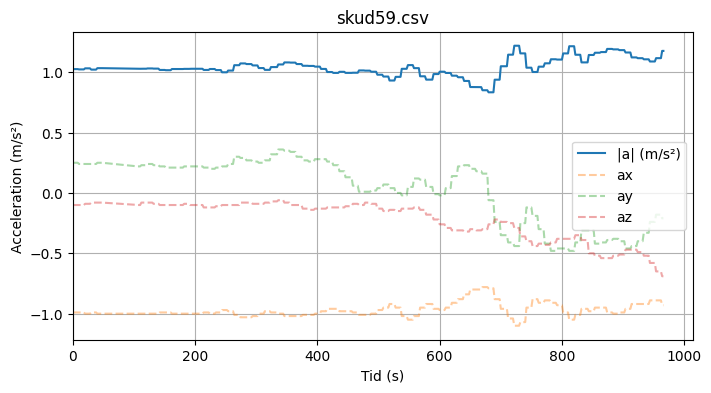

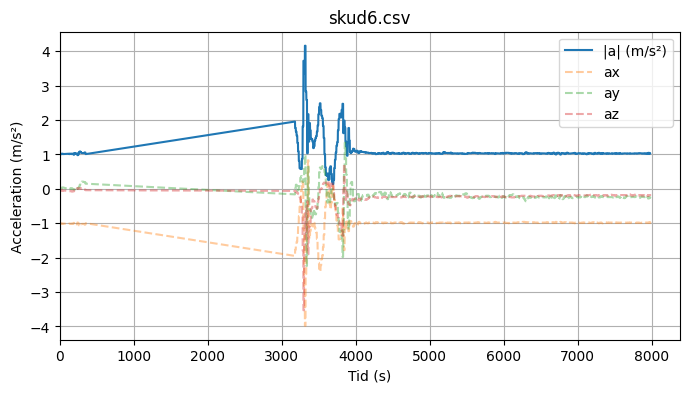

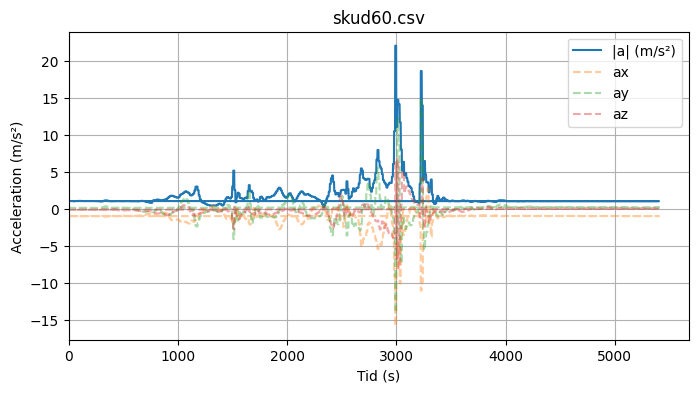

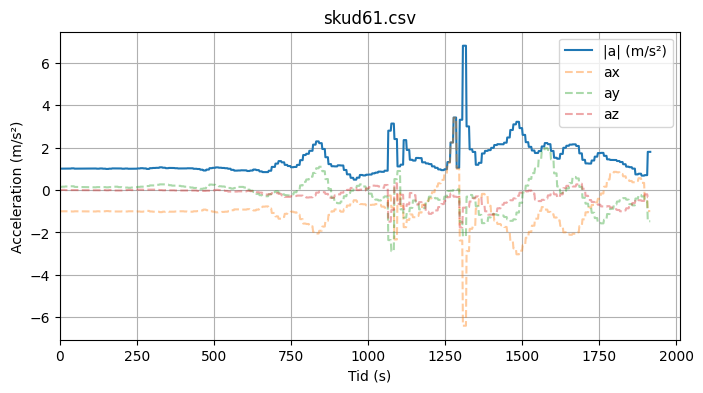

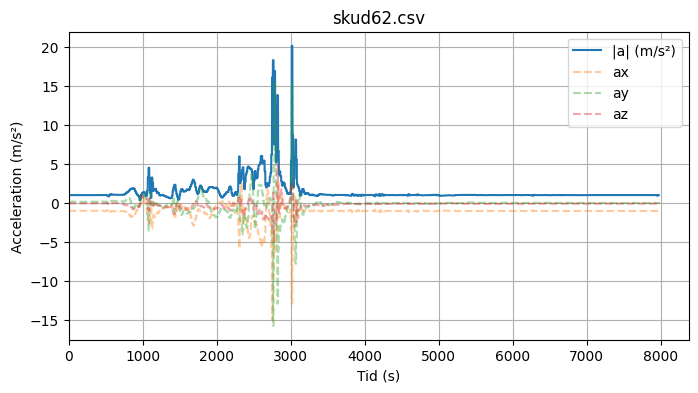

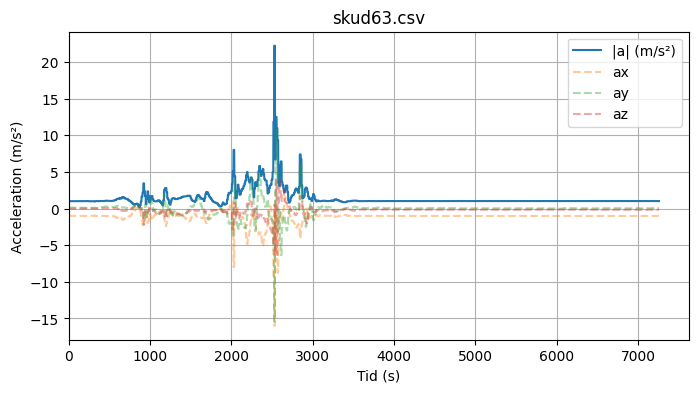

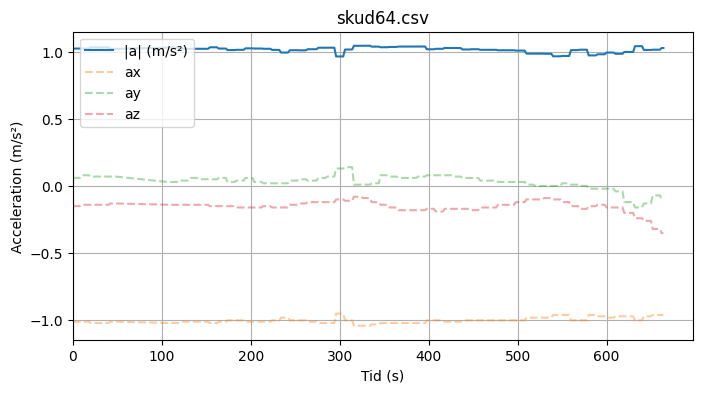

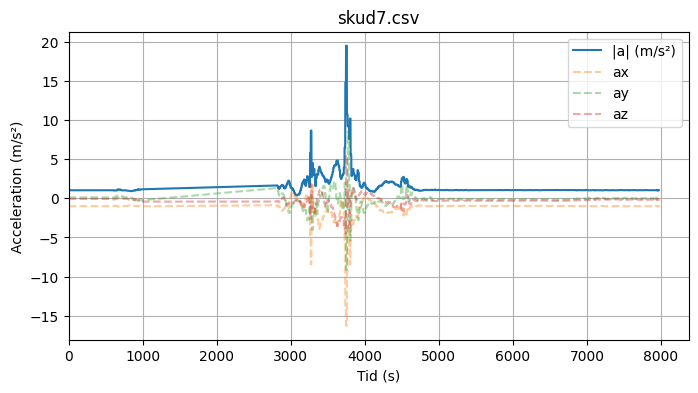

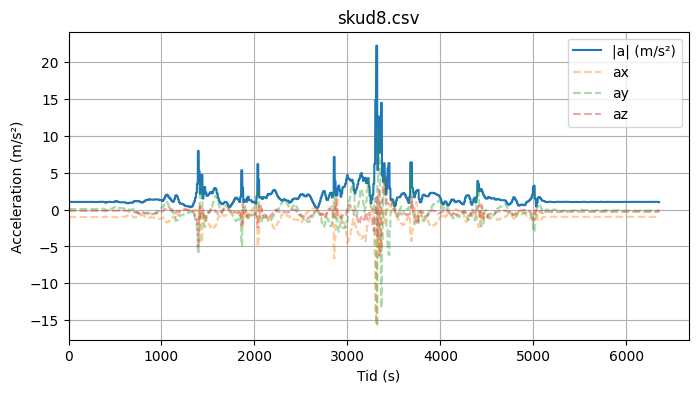

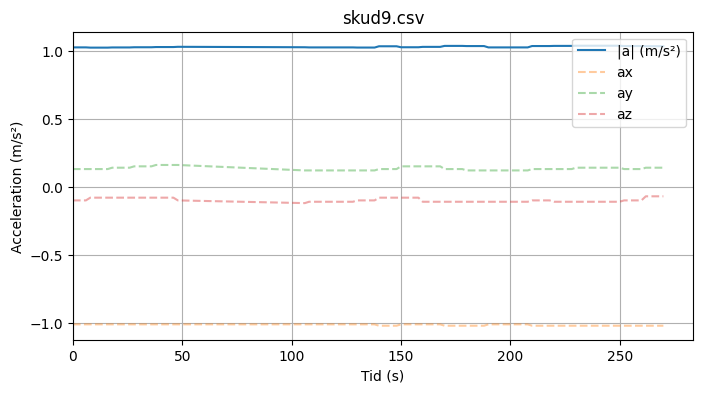

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob, os

path = "../skud"
files = sorted(glob.glob(os.path.join(path, "skud*.csv")))

for f in files:
    data = pd.read_csv(f, decimal=",")
    data.columns = [c.strip().lower() for c in data.columns]
    for col in ['accx','accy','accz','timestamp']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    data['a_mag'] = np.sqrt(data['accx']**2 + data['accy']**2 + data['accz']**2)
    t = (data['timestamp'] - data['timestamp'].iloc[0]) / 1000.0

    plt.figure(figsize=(8,4))
    plt.plot(t, data['a_mag'], label='|a| (m/s²)')
    plt.plot(t, data['accx'], '--', alpha=0.4, label='ax')
    plt.plot(t, data['accy'], '--', alpha=0.4, label='ay')
    plt.plot(t, data['accz'], '--', alpha=0.4, label='az')
    plt.title(os.path.basename(f))
    plt.xlabel("Tid (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.legend()
    plt.grid(True)
    plt.xlim(left=0)  # start altid x-akse ved 0
    plt.show()


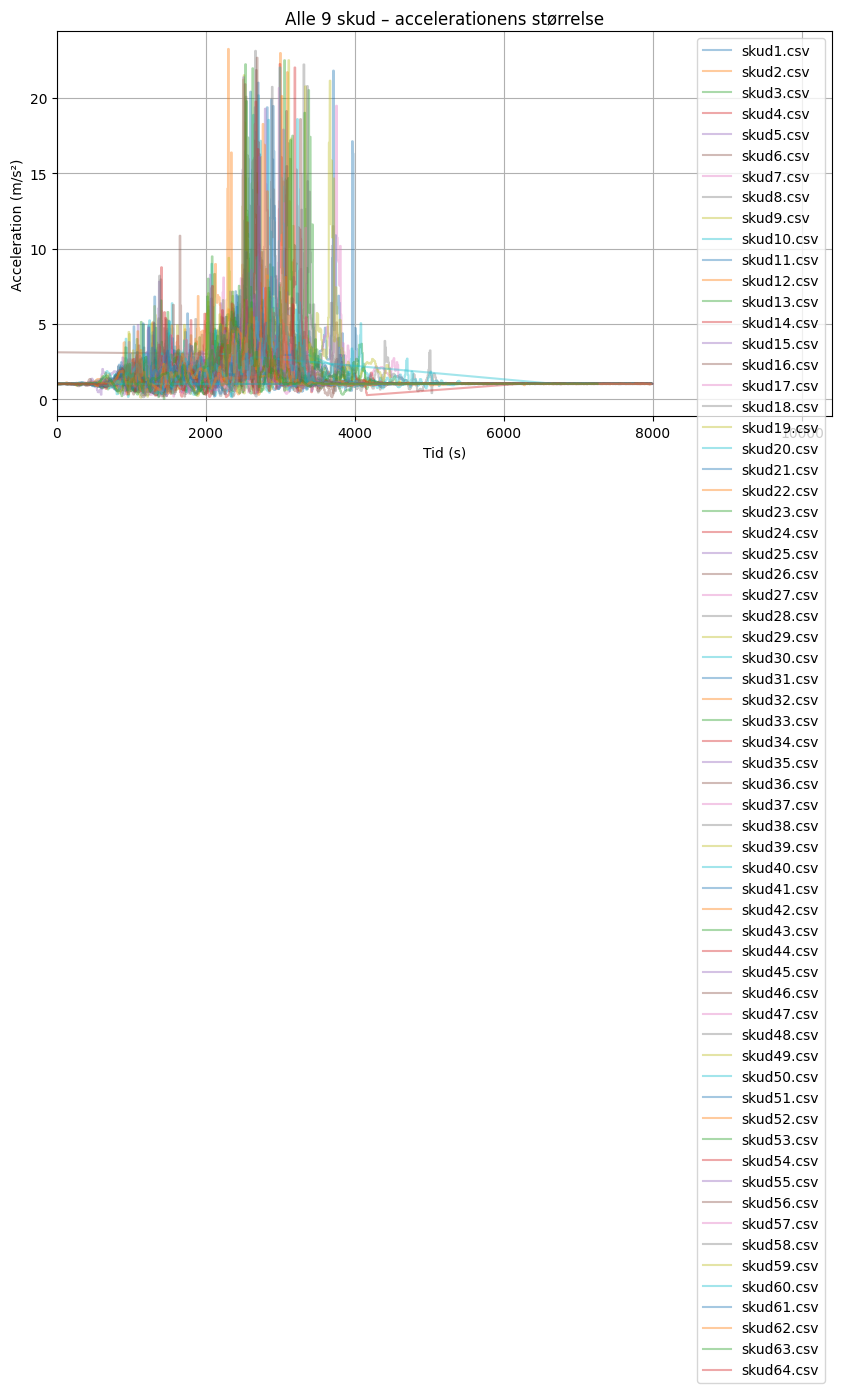

file  samples  duration_s     peak_g    mean_g
0    skud1.csv     1993    4039.921  21.810761  1.983750
1    skud2.csv     1924    3905.896  21.710486  1.976722
2    skud3.csv     2677    7956.053   6.580714  1.307665
3    skud4.csv      254 -953519.462   1.102270  1.038701
4    skud5.csv     1076    2205.930   6.690247  1.457654
..         ...      ...         ...        ...       ...
59  skud60.csv     2698      47.951  22.016953  1.769080
60  skud61.csv      931    1915.960   6.811850  1.419648
61  skud62.csv     3912    7959.867  20.122366  1.504926
62  skud63.csv     3602 -695965.298  22.234102  1.454444
63  skud64.csv      305     663.944   1.043935  1.014670

[64 rows x 5 columns]

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob, os, re

path = "../skud"   # hvor dine skud1–9.csv ligger
files = glob.glob(os.path.join(path, "skud*.csv"))
files.sort(key=lambda x: int(re.search(r'\d+', os.path.basename(x)).group()))

summary = []

plt.figure(figsize=(10,5))
for f in files:
    data = pd.read_csv(f, decimal=",")
    data.columns = [c.strip().lower() for c in data.columns]
    for c in ['accx','accy','accz','timestamp']:
        data[c] = pd.to_numeric(data[c], errors='coerce')

    data['a_mag'] = np.sqrt(data['accx']**2 + data['accy']**2 + data['accz']**2)
    t = (data['timestamp'] - data['timestamp'].iloc[0]) / 1000.0

    plt.plot(t, data['a_mag'], alpha=0.4, label=os.path.basename(f))

    summary.append({
        'file': os.path.basename(f),
        'samples': len(data),
        'duration_s': t.iloc[-1],
        'peak_g': data['a_mag'].max(),
        'mean_g': data['a_mag'].mean()
    })

plt.title("Alle 9 skud – accelerationens størrelse")
plt.xlabel("Tid (s)")
plt.ylabel("Acceleration (m/s²)")
plt.xlim(left=0)
plt.grid(True)
plt.legend()
plt.show()

pd.DataFrame(summary)


In [27]:
import pandas as pd
import numpy as np

data = pd.read_csv("../skud/skud1.csv", decimal=",")
data.columns = [c.strip().lower() for c in data.columns]
for col in ['accx','accy','accz','timestamp']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# beregn tidsdifferenser
dt = np.diff(data['timestamp'])
print("Antal samples:", len(data))
print("Middel sampling-interval (ms):", np.mean(dt))
print("Min / Max dt (ms):", np.min(dt), "/", np.max(dt))
print("Total varighed (s):", (data['timestamp'].iloc[-1] - data['timestamp'].iloc[0]) / 1000)


Antal samples: 1993
Middel sampling-interval (ms): 2028.0727911646586
Min / Max dt (ms): 1841 / 58013
Total varighed (s): 4039.921


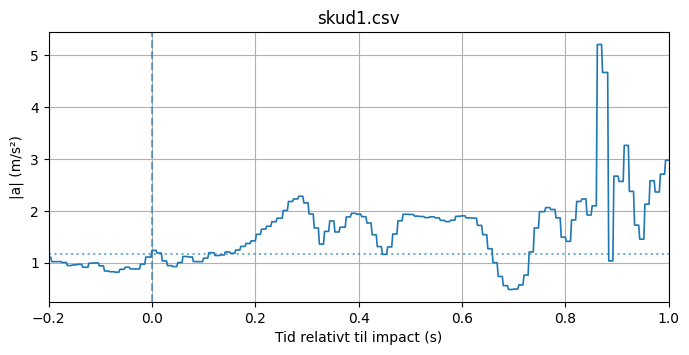

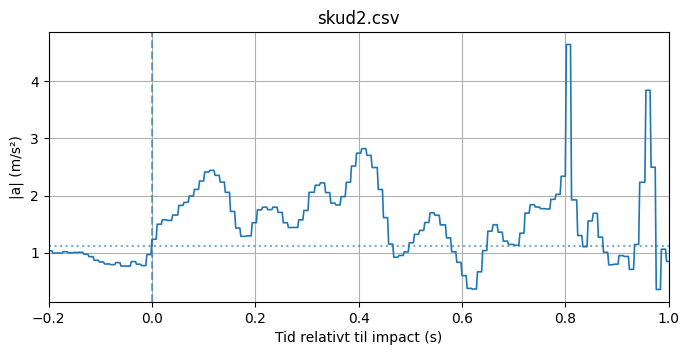

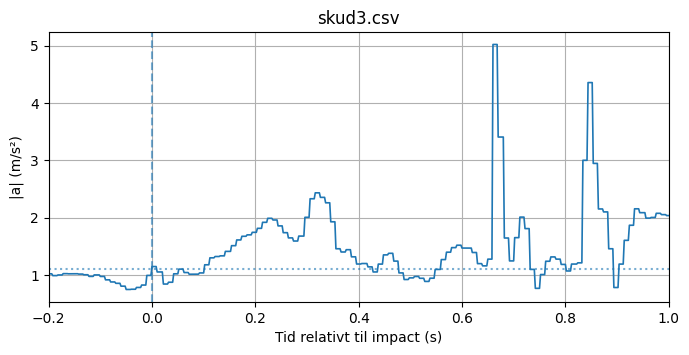

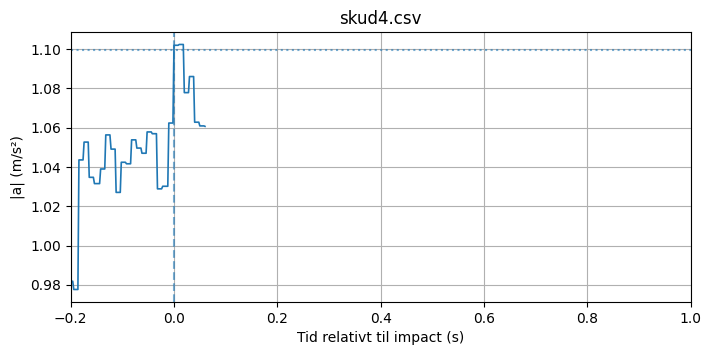

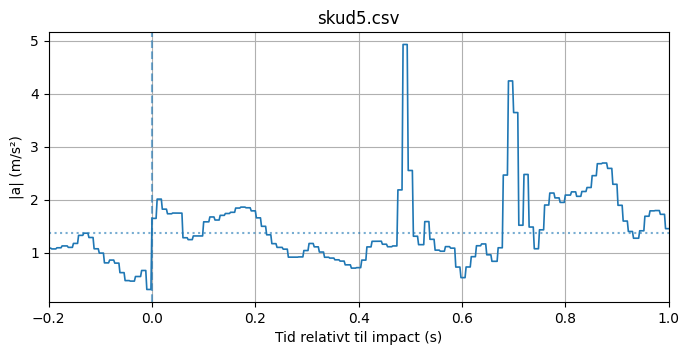

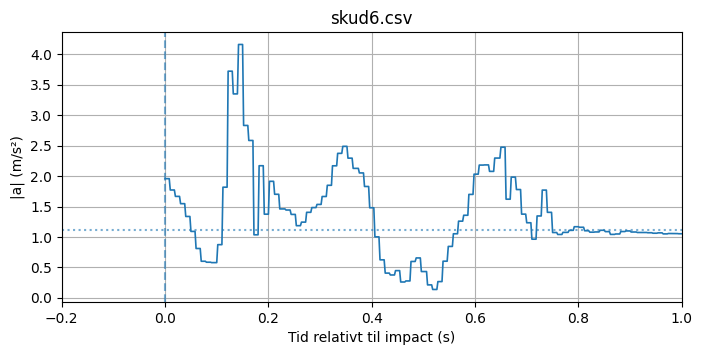

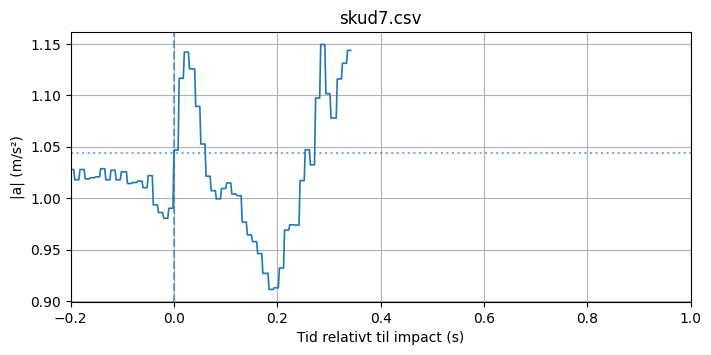

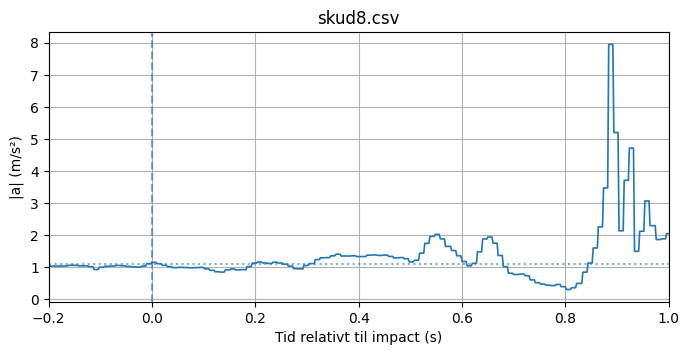

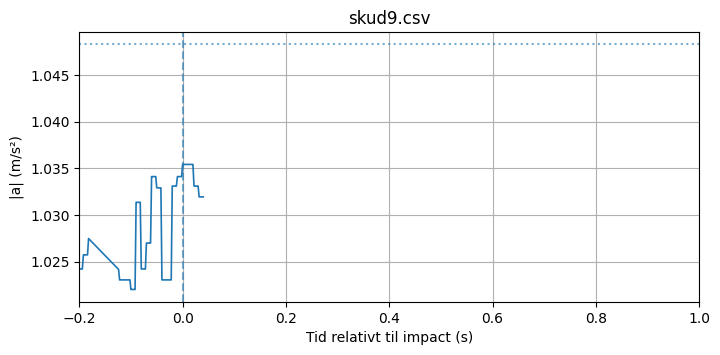

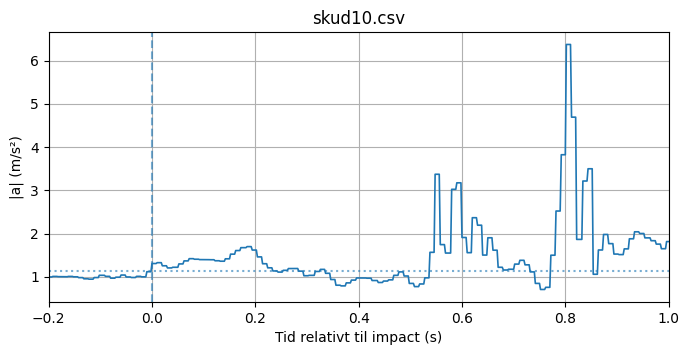

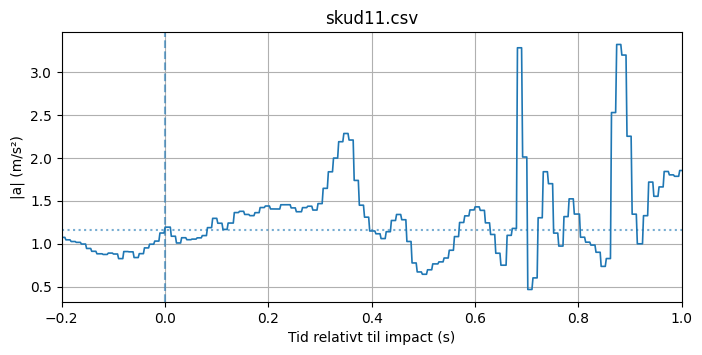

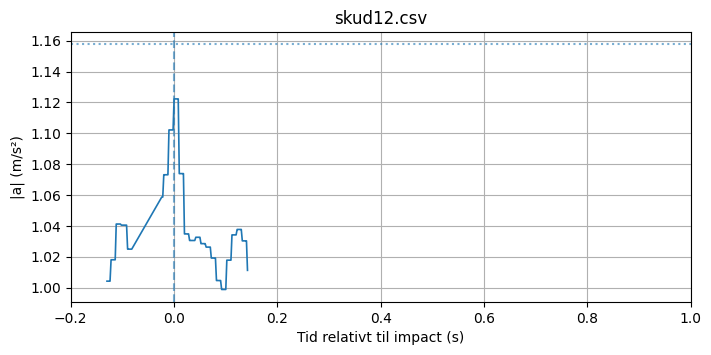

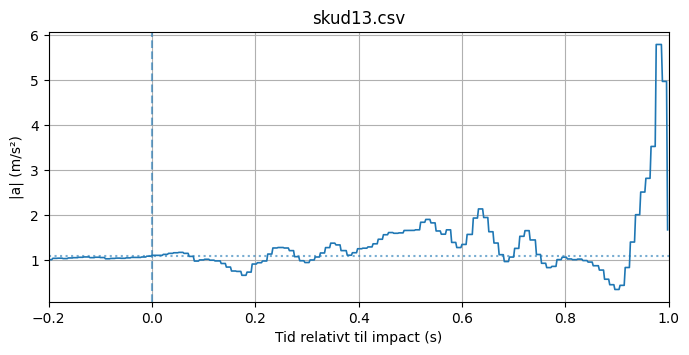

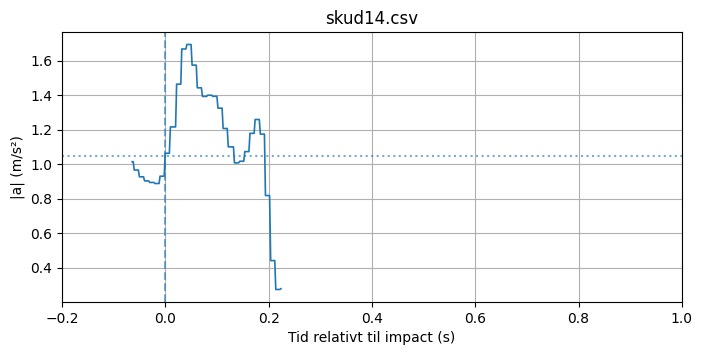

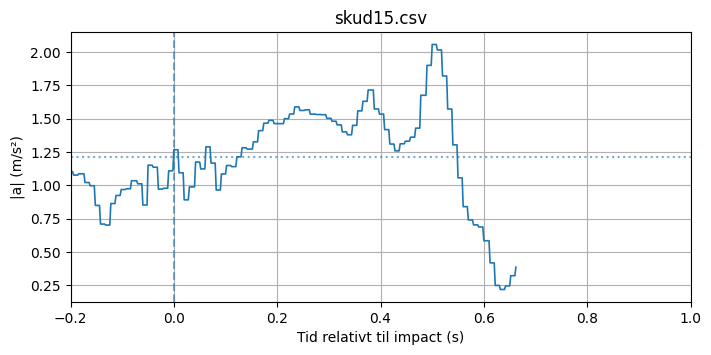

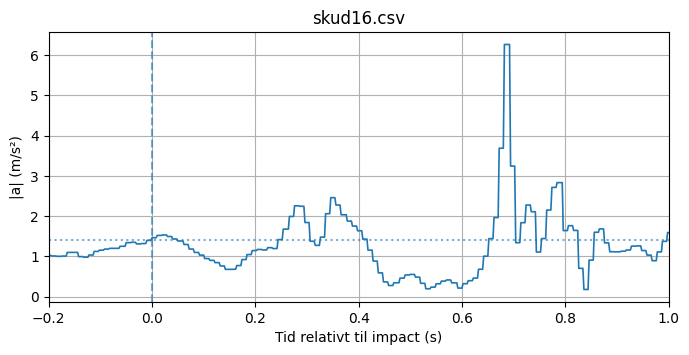

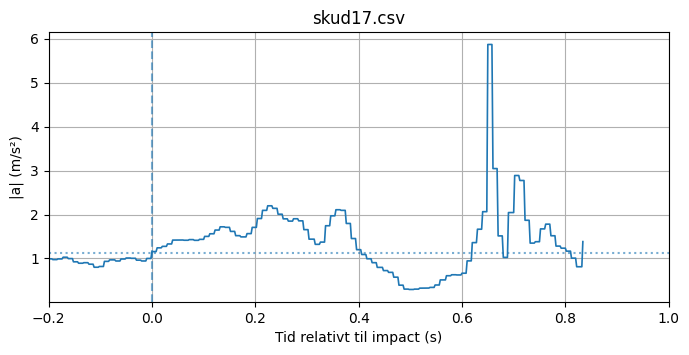

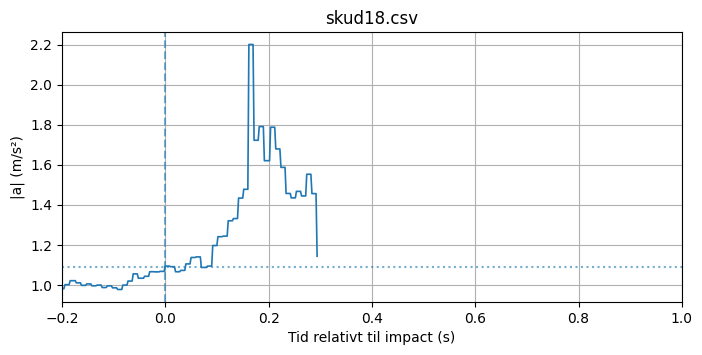

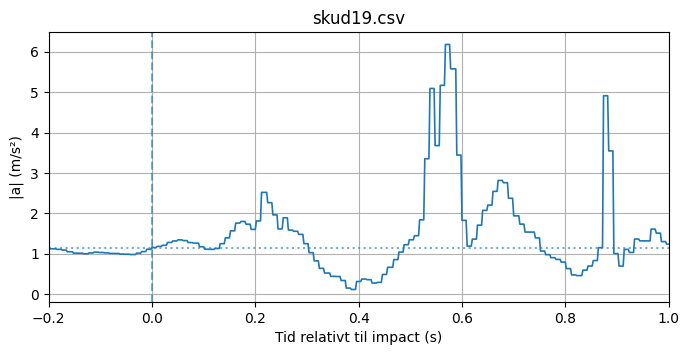

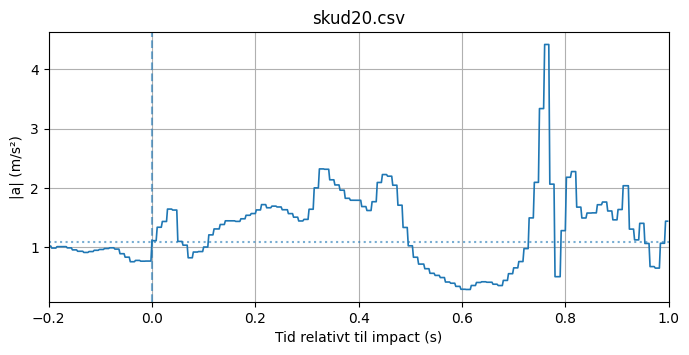

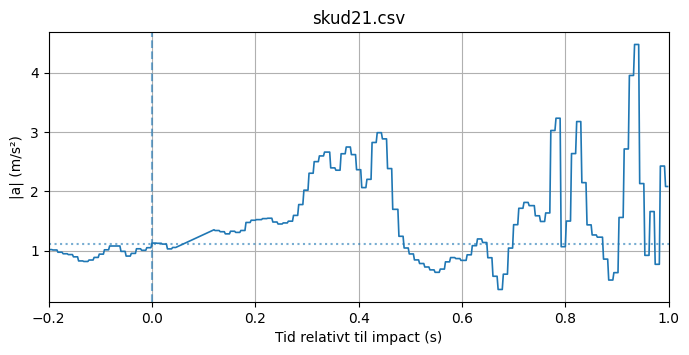

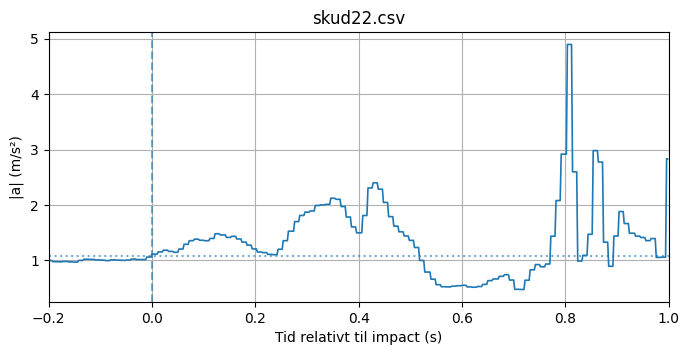

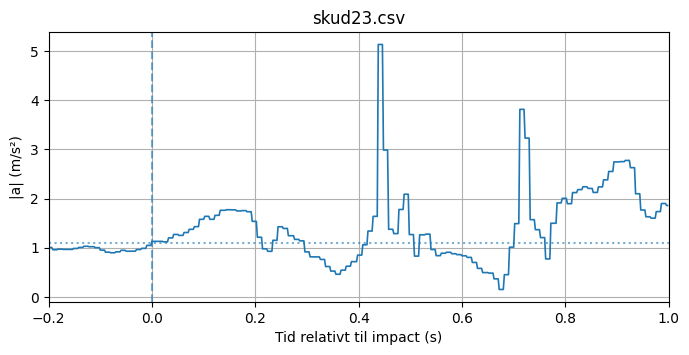

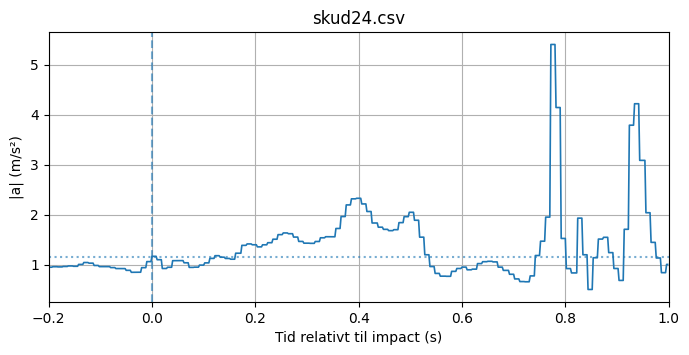

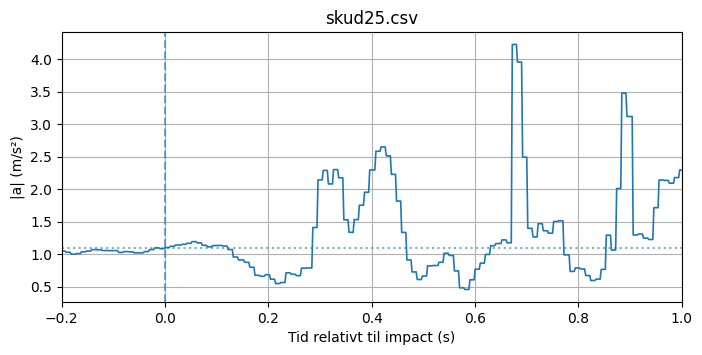

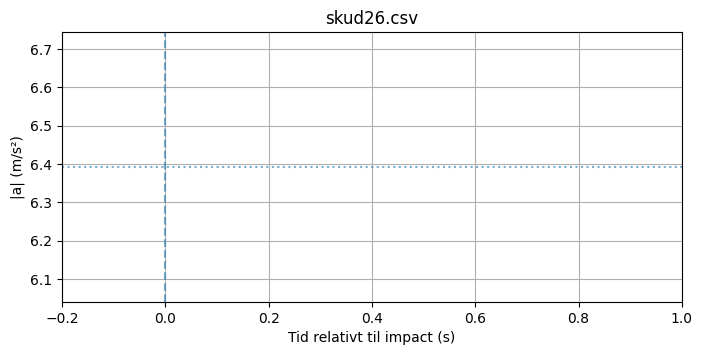

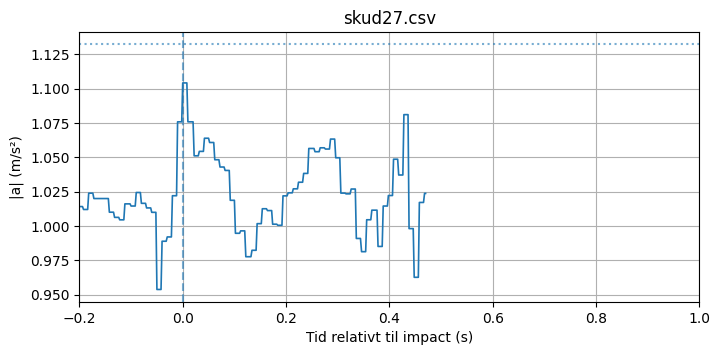

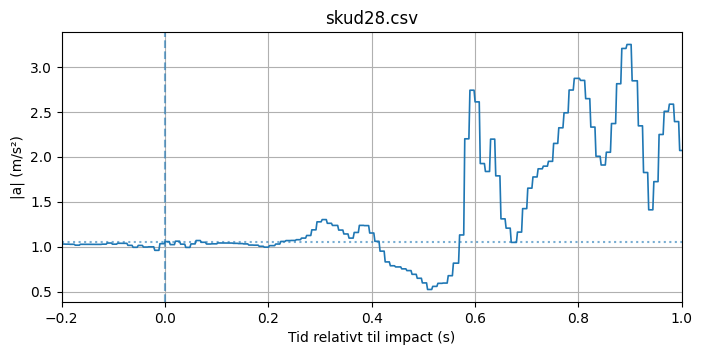

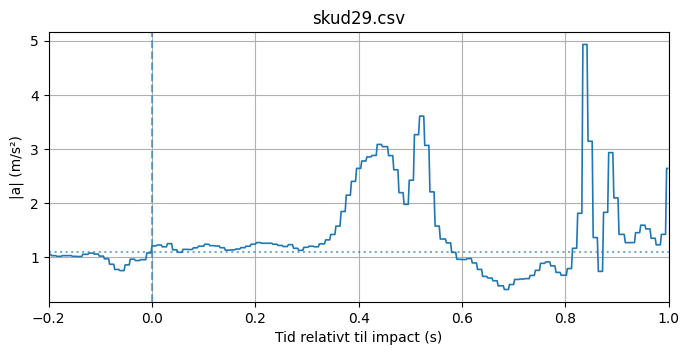

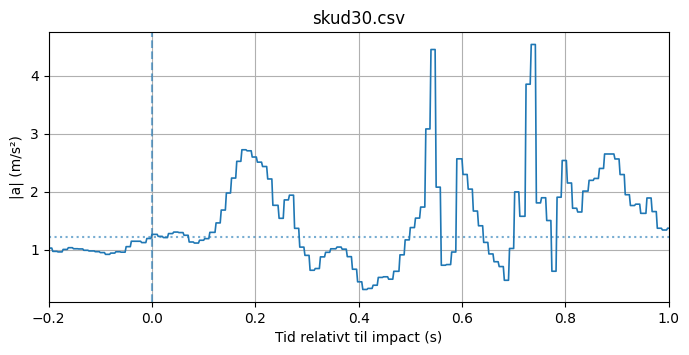

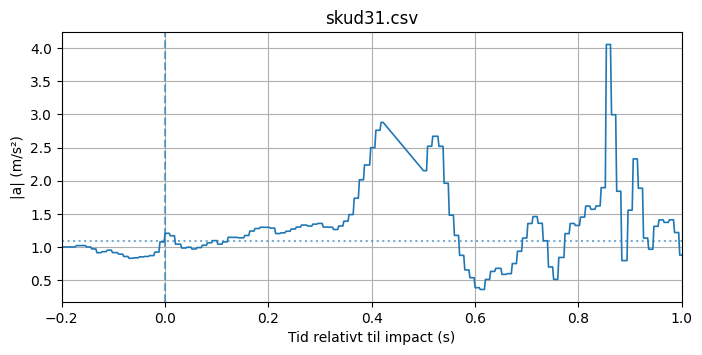

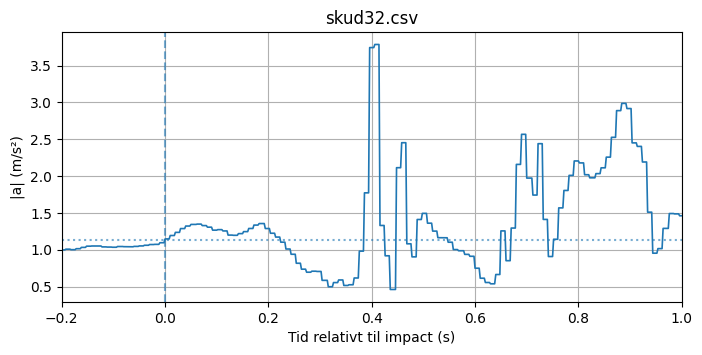

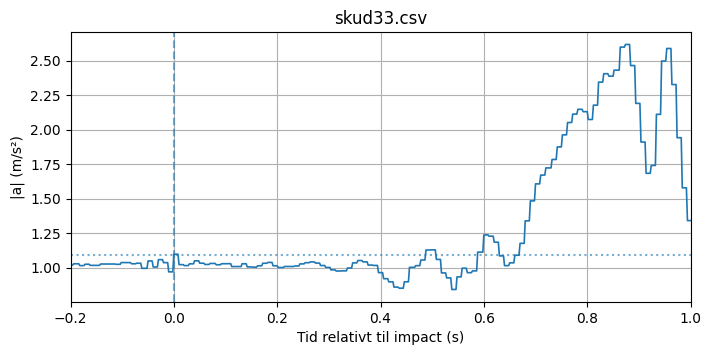

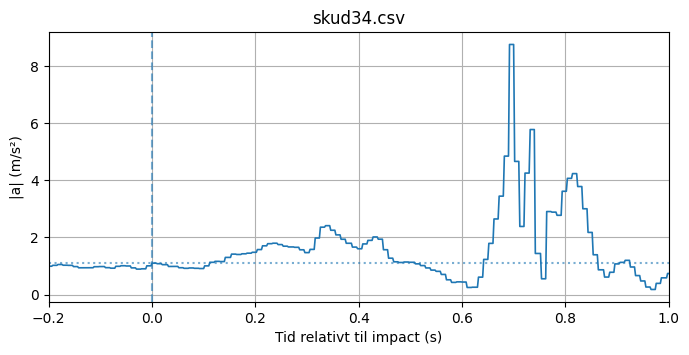

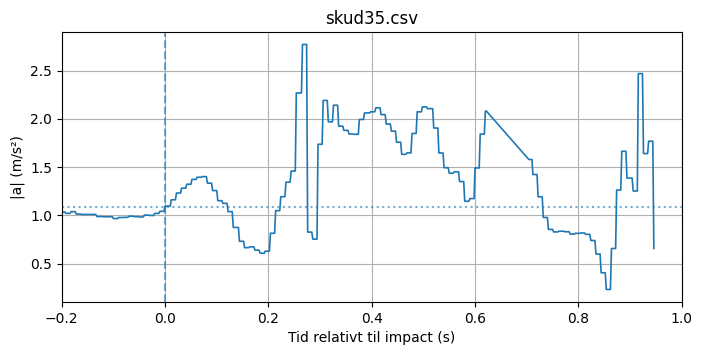

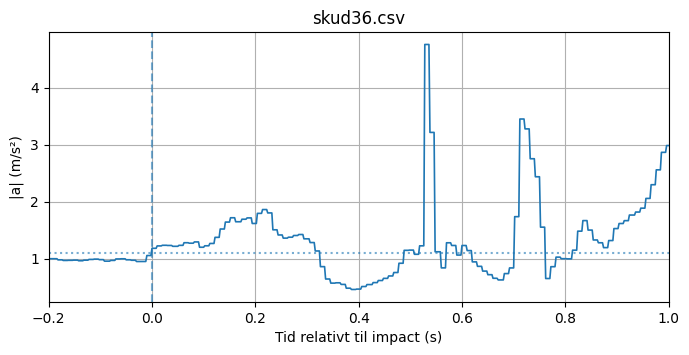

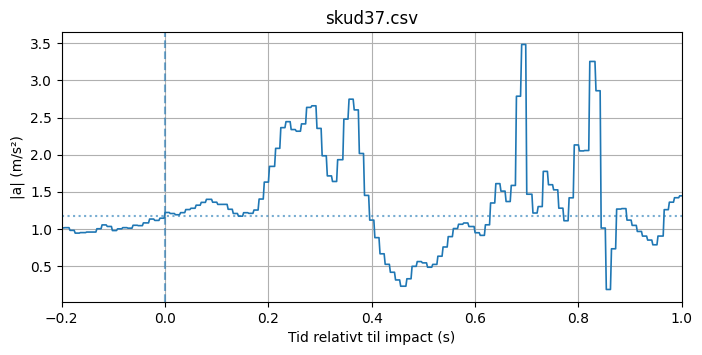

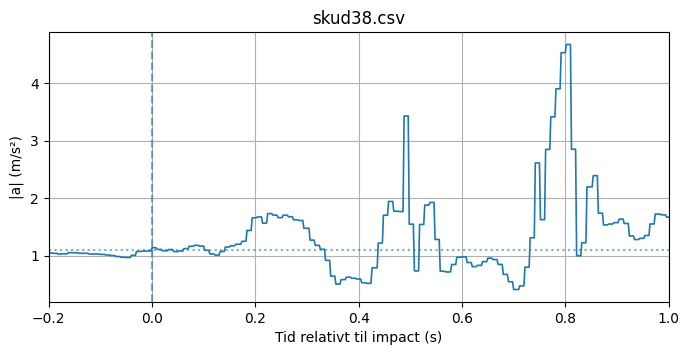

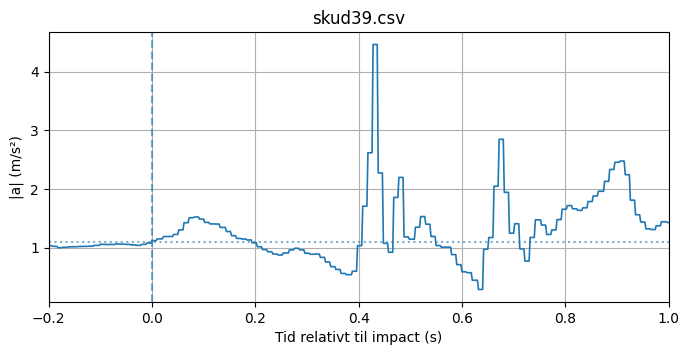

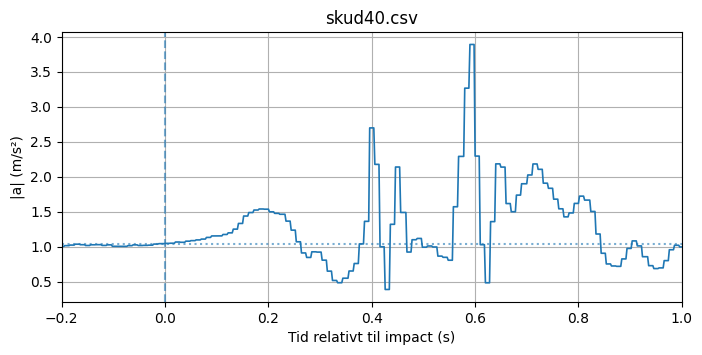

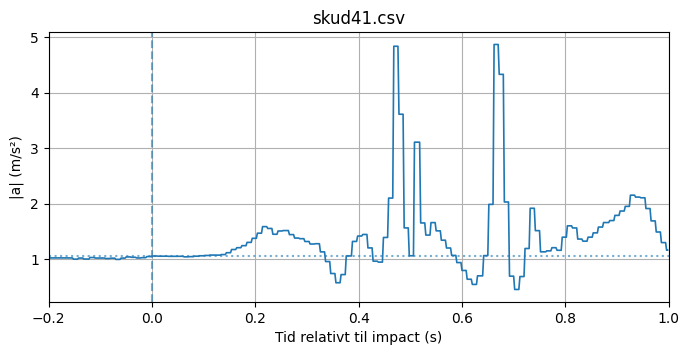

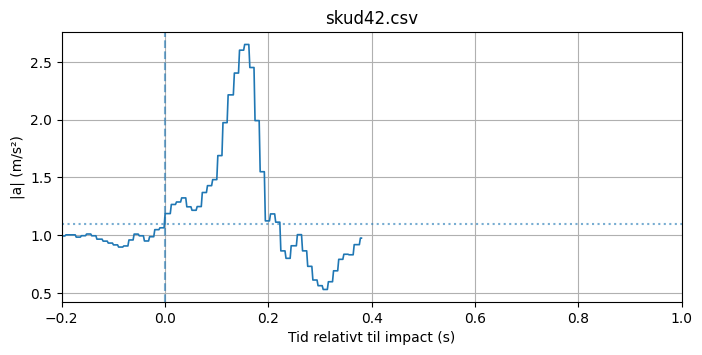

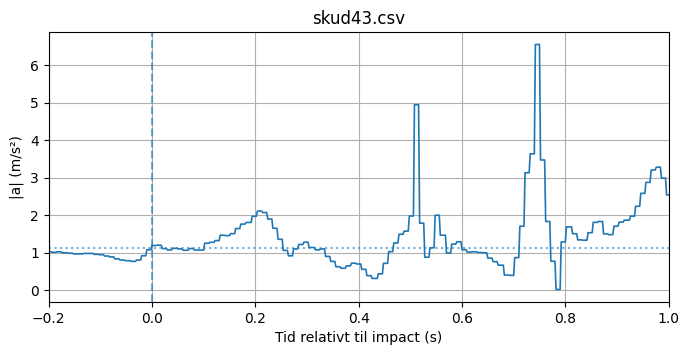

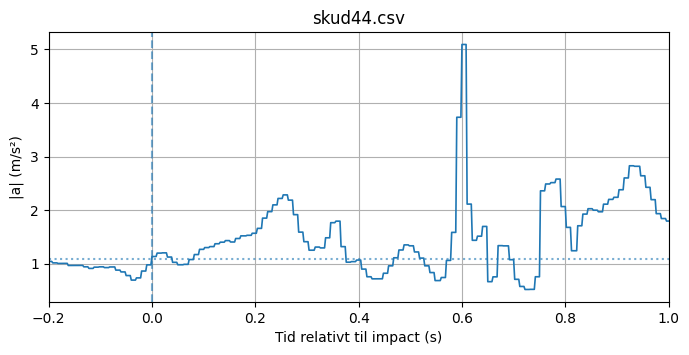

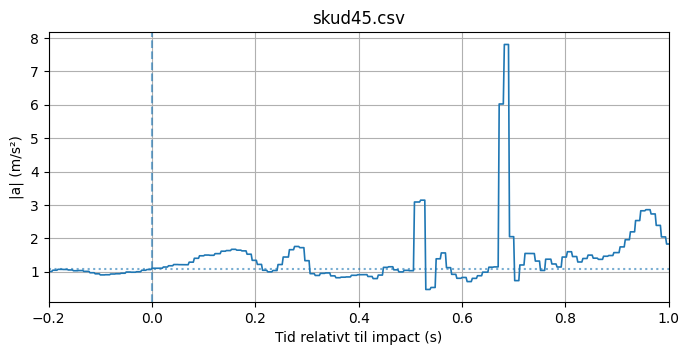

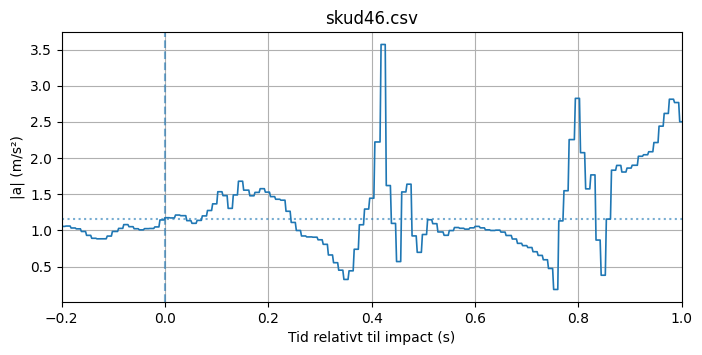

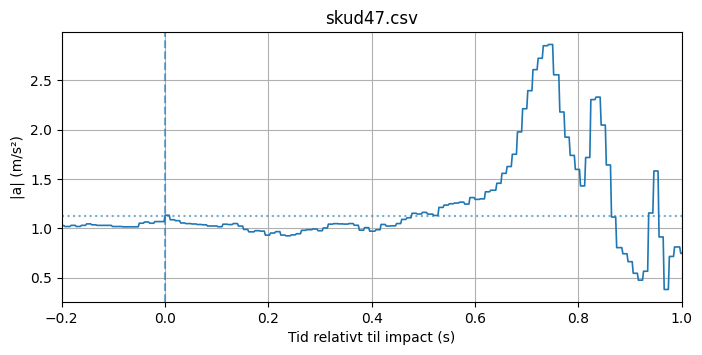

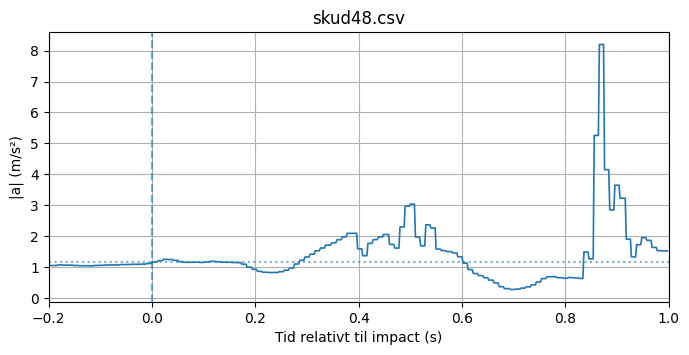

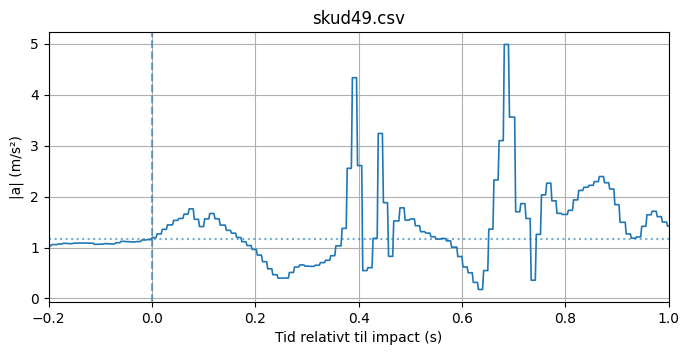

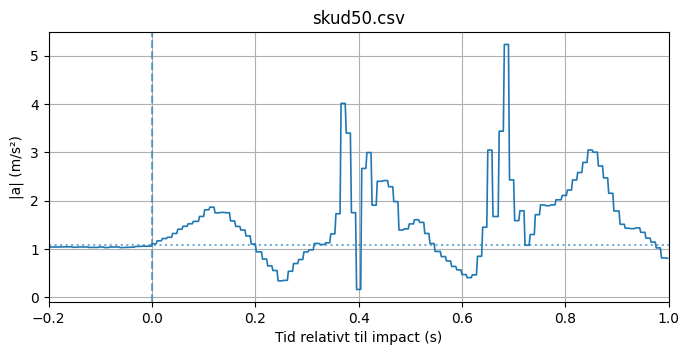

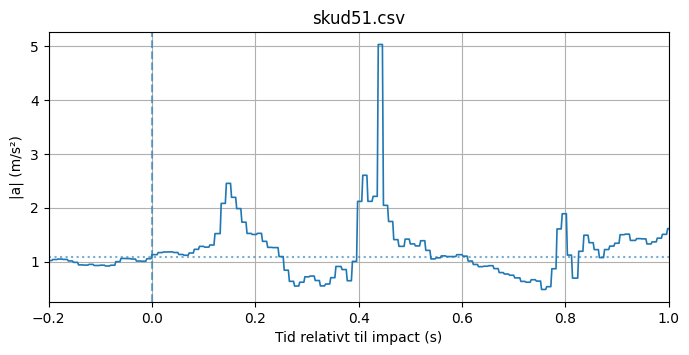

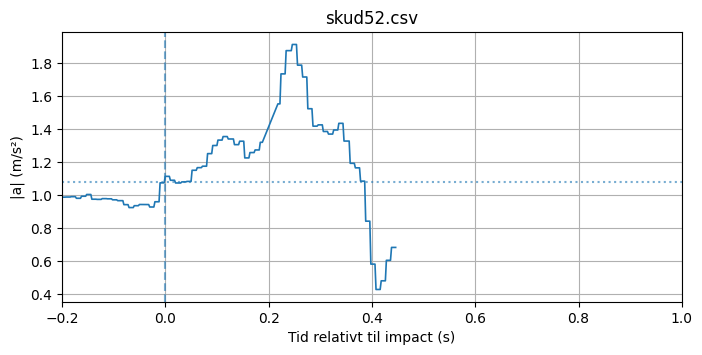

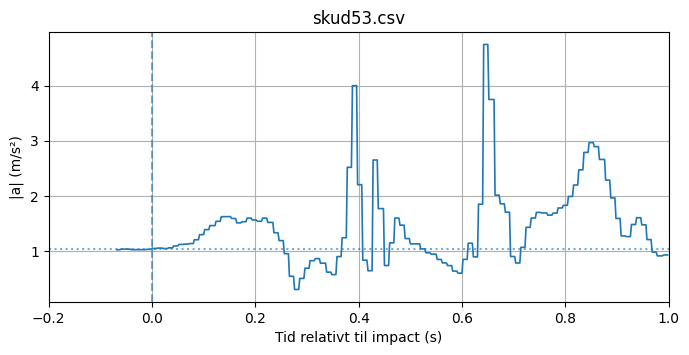

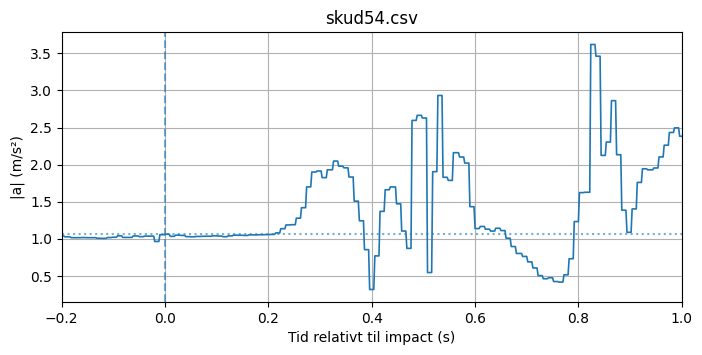

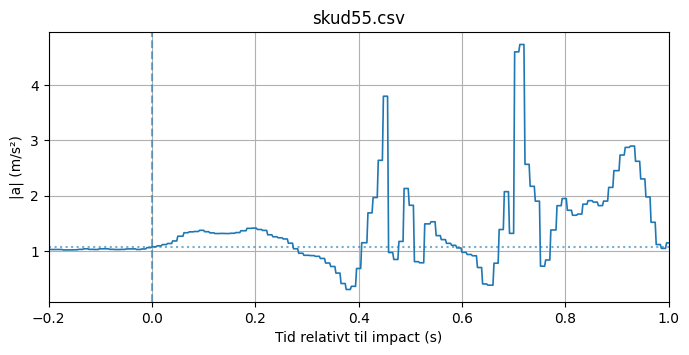

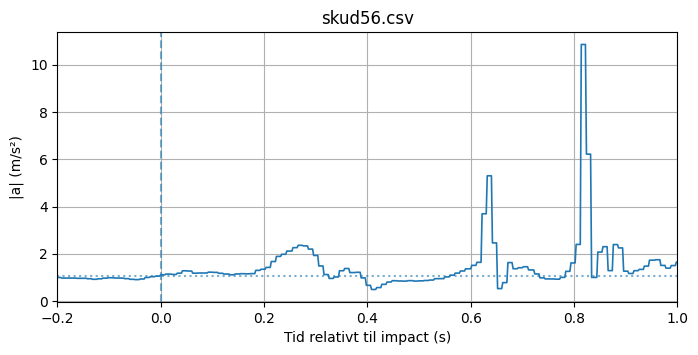

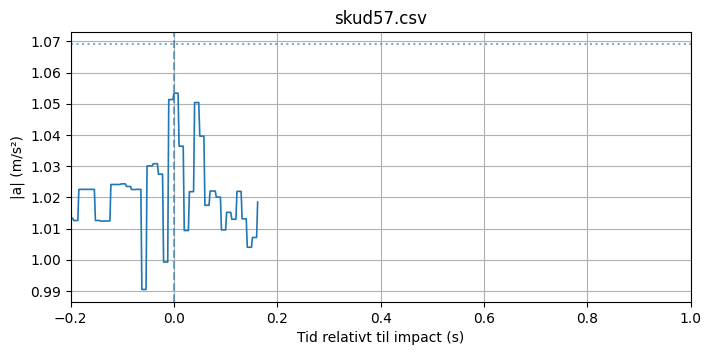

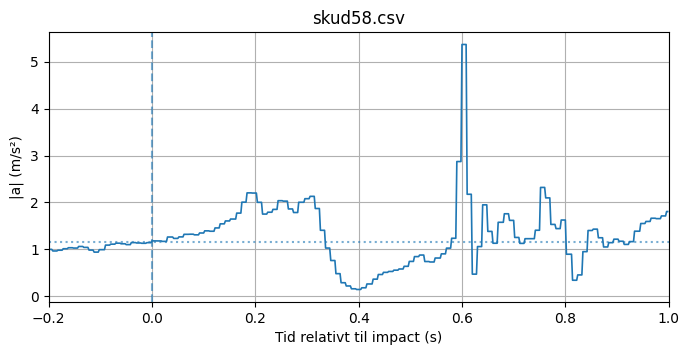

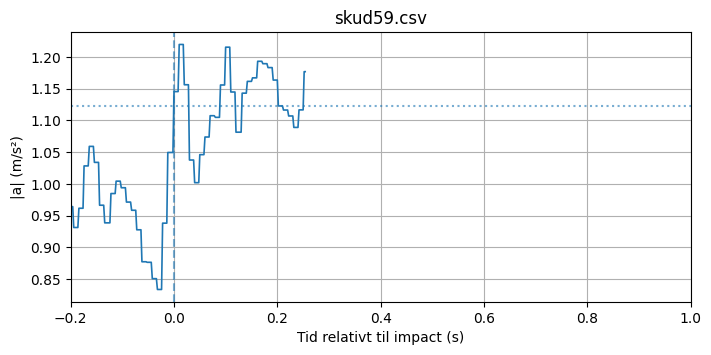

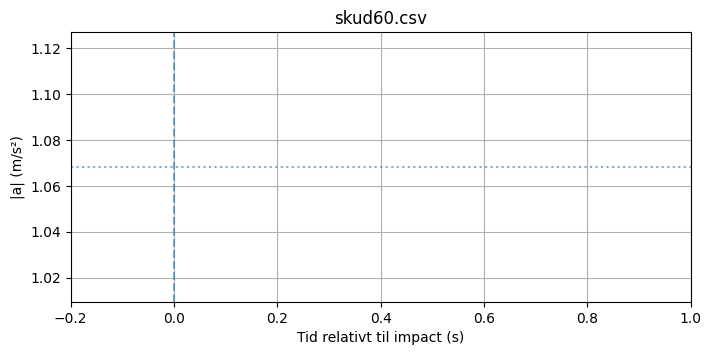

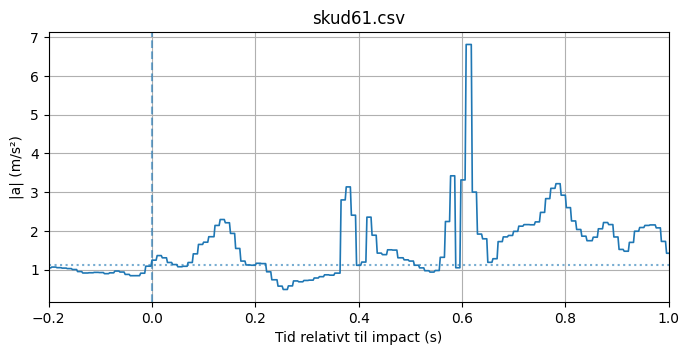

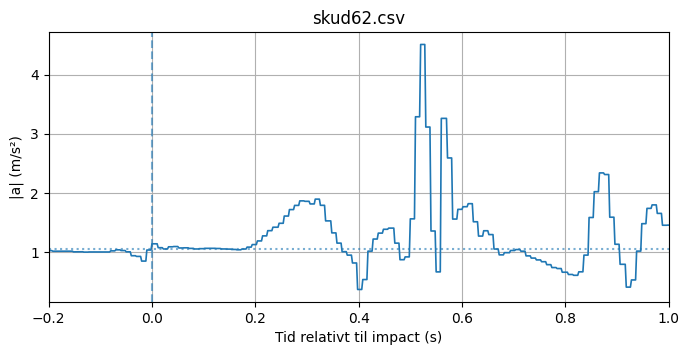

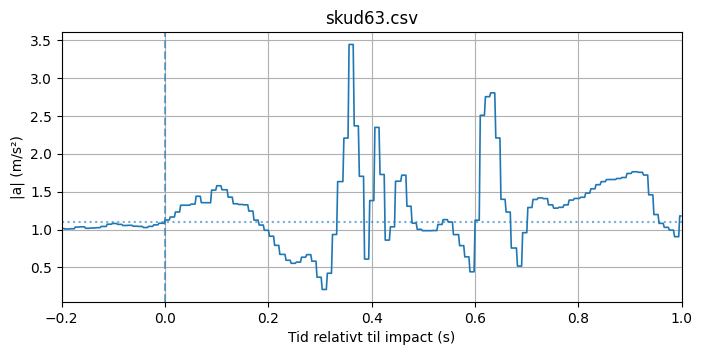

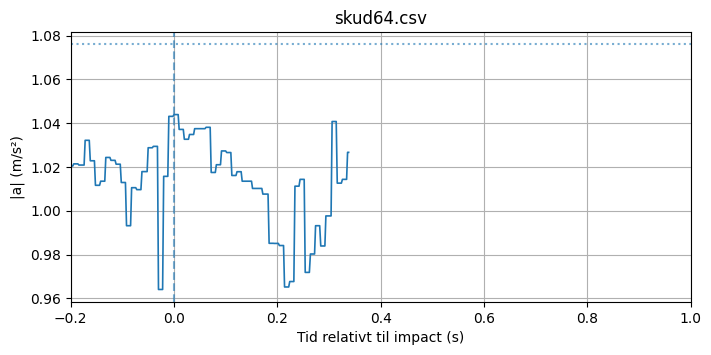

file  samples  impact_t(s)  peak(m/s^2)  window_target(s)  \
0    skud1.csv      601        0.640        21.81               1.2   
1    skud2.csv      601        0.916        21.71               1.2   
2    skud3.csv      601        0.644         6.58               1.2   
3    skud4.csv      130        0.500         1.10               1.2   
4    skud5.csv      601        0.600         6.69               1.2   
..         ...      ...          ...          ...               ...   
59  skud60.csv        0        0.330        22.02               1.2   
60  skud61.csv      600        0.700         6.81               1.2   
61  skud62.csv      600        0.562        20.12               1.2   
62  skud63.csv      600        0.564        22.23               1.2   
63  skud64.csv      269        0.326         1.04               1.2   

    window_got(s)  complete_window  impact_within_3s  
0           1.200             True              True  
1           1.200             True              True  
2           1.200             True              True  
3           0.258            False              True  
4           1.200             True              True  
..            ...              ...               ...  
59          0.000            False              True  
60          1.198             True              True  
61          1.198             True              True  
62          1.198             True              True  
63          0.536            False              True  

[64 rows x 8 columns]

In [29]:
import pandas as pd, numpy as np, glob, os, re, matplotlib.pyplot as plt

path = "../skud"  # mappe med skud1..N.csv
files = glob.glob(os.path.join(path, "skud*.csv"))
files.sort(key=lambda x: int(re.search(r"\d+", os.path.basename(x)).group()))

def load_csv(f):
    df = pd.read_csv(f, decimal=",")
    df.columns = [c.strip().lower() for c in df.columns]
    for c in ["timestamp","accx","accy","accz"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df = df.dropna(subset=["timestamp","accx","accy","accz"])
    t = (df["timestamp"] - df["timestamp"].iloc[0]) / 1_000_000.0  # µs → s
    a = np.sqrt(df["accx"]**2 + df["accy"]**2 + df["accz"]**2)
    return t.values, a.values

def segment(t, a, pre=0.2, post=1.0):
    # baseline: første 0.5 s
    m = t <= min(0.5, t[-1])
    mu, sd = np.mean(a[m]), np.std(a[m])
    thr = mu + 4*sd if sd>0 else mu + 0.5
    idx = np.argmax(a > thr)
    if not (a[idx] > thr):  # fallback: global peak
        idx = int(np.argmax(a))
    t0 = t[idx]
    w0, w1 = max(0.0, t0-pre), min(t[-1], t0+post)
    sel = (t >= w0) & (t <= w1)
    # QC: hvor meget af vinduet har vi reelt?
    target_len = (pre+post)
    got_len = t[sel][-1] - t[sel][0] if sel.sum()>1 else 0.0
    return sel, t0, thr, target_len, got_len

qc_rows = []
for f in files:
    t, a = load_csv(f)
    sel, t0, thr, target_len, got_len = segment(t, a, pre=0.2, post=1.0)

    # Plot kun vinduet
    plt.figure(figsize=(8,3.5))
    plt.plot(t[sel]-t0, a[sel], lw=1.2)
    plt.axvline(0, ls="--", alpha=0.6)         # impact-tid
    plt.axhline(thr, ls=":", alpha=0.6)        # threshold (info)
    plt.title(os.path.basename(f))
    plt.xlabel("Tid relativt til impact (s)")
    plt.ylabel("|a| (m/s²)")
    plt.grid(True)
    plt.xlim(-0.2, 1.0)
    plt.show()

    qc_rows.append({
        "file": os.path.basename(f),
        "samples": sel.sum(),
        "impact_t(s)": round(float(t0), 3),
        "peak(m/s^2)": round(float(a.max()), 2),
        "window_target(s)": target_len,
        "window_got(s)": round(got_len, 3),
        "complete_window": got_len >= (target_len - 0.02),
        "impact_within_3s": t0 <= 3.0
    })

qc = pd.DataFrame(qc_rows)
qc
